# Importing Libraries

In [2]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from itertools import product
from scipy.stats import skewnorm

from datetime import datetime
from sklearn.impute import KNNImputer
from ydata_profiling import ProfileReport

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set()

# Reading the Data

In [3]:
df_customer = pd.read_csv('/Users/miguelcaramelo/Desktop/Data_Science/1_semestre/Data_Mining/Projeto/Data-Mining/DM_AIAI_CustomerDB (1).csv', sep = ',')

# Metadata

In [4]:
df_customer.head()

Unnamed: 0  Loyalty# First Name    Last Name        Customer Name Country  \
0           0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1           1    549612      Dayle        Menez          Dayle Menez  Canada   
2           2    429460     Necole       Hannon        Necole Hannon  Canada   
3           3    608370      Queen        Hagee          Queen Hagee  Canada   
4           4    530508     Claire      Latting       Claire Latting  Canada   

  Province or State       City   Latitude   Longitude  ...  Gender Education  \
0           Ontario    Toronto  43.653225  -79.383186  ...  female  Bachelor   
1           Alberta   Edmonton  53.544388 -113.490930  ...    male   College   
2  British Columbia  Vancouver  49.282730 -123.120740  ...    male   College   
3           Ontario    Toronto  43.653225  -79.383186  ...    male   College   
4            Quebec       Hull  45.428730  -75.713364  ...    male  Bachelor   

  Location Code   Income  Marital Status LoyaltyStatus EnrollmentDateOpening  \
0         Urban  70146.0         Married          Star             2/15/2019   
1         Rural      0.0        Divorced          Star              3/9/2019   
2         Urban      0.0          Single          Star             7/14/2017   
3      Suburban      0.0          Single          Star             2/17/2016   
4      Suburban  97832.0         Married          Star            10/25/2017   

  CancellationDate Customer Lifetime Value  EnrollmentType  
0              NaN                 3839.14        Standard  
1              NaN                 3839.61        Standard  
2         1/8/2021                 3839.75        Standard  
3              NaN                 3839.75        Standard  
4              NaN                 3842.79  2021 Promotion  

[5 rows x 21 columns]

In [5]:
df_customer.tail()

Unnamed: 0  Loyalty# First Name Last Name    Customer Name Country  \
16916          15    100012      Ethan  Thompson   Ethan Thompson  Canada   
16917          16    100013      Layla     Young      Layla Young  Canada   
16918          17    100014     Amelia   Bennett   Amelia Bennett  Canada   
16919          18    100015   Benjamin    Wilson  Benjamin Wilson  Canada   
16920          19    100016       Emma    Martin      Emma Martin  Canada   

      Province or State          City   Latitude   Longitude  ...  Gender  \
16916            Quebec   Quebec City  46.759733  -71.141009  ...    male   
16917           Alberta      Edmonton  53.524829 -113.546357  ...  female   
16918     New Brunswick       Moncton  46.051866  -64.825428  ...    male   
16919            Quebec   Quebec City  46.862970  -71.133444  ...  female   
16920  British Columbia  Dawson Creek  55.720562 -120.160090  ...  female   

      Education Location Code Income  Marital Status LoyaltyStatus  \
16916  Bachelor      Suburban    NaN          Single          Star   
16917  Bachelor         Rural    NaN         Married          Star   
16918  Bachelor         Rural    NaN         Married          Star   
16919   College         Urban    NaN         Married          Star   
16920    Master      Suburban    NaN          Single          Star   

      EnrollmentDateOpening CancellationDate Customer Lifetime Value  \
16916             2/27/2019        2/27/2019                     NaN   
16917             9/20/2017        9/20/2017                     NaN   
16918            11/28/2020       11/28/2020                     NaN   
16919              4/9/2020         4/9/2020                     NaN   
16920             7/21/2020        7/21/2020                     NaN   

       EnrollmentType  
16916        Standard  
16917        Standard  
16918        Standard  
16919        Standard  
16920        Standard  

[5 rows x 21 columns]

# Initial Analysis

In [6]:
# Checking shape of dataframe
df_customer.shape

(16921, 21)

In [7]:
# Checking the info of the dataframe
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16921 non-null  int64  
 1   Loyalty#                 16921 non-null  int64  
 2   First Name               16921 non-null  object 
 3   Last Name                16921 non-null  object 
 4   Customer Name            16921 non-null  object 
 5   Country                  16921 non-null  object 
 6   Province or State        16921 non-null  object 
 7   City                     16921 non-null  object 
 8   Latitude                 16921 non-null  float64
 9   Longitude                16921 non-null  float64
 10  Postal code              16921 non-null  object 
 11  Gender                   16921 non-null  object 
 12  Education                16921 non-null  object 
 13  Location Code            16921 non-null  object 
 14  Income                

In [60]:
df_customer.describe().T

count                           mean  \
Unnamed: 0               16921.0                    8440.023639   
Loyalty#                 16921.0                  550197.393771   
Latitude                 16921.0                        47.1745   
Longitude                16921.0                     -91.814768   
Income                   16901.0                     37758.0384   
EnrollmentDateOpening      16921  2018-10-05 09:50:05.567046912   
CancellationDate            2308  2019-12-14 06:51:09.670710528   
Customer Lifetime Value  16901.0                    7990.460188   
CustomerTenure             16921   1079 days 17:44:47.287985344   

                                          min                  25%  \
Unnamed: 0                                0.0               4210.0   
Loyalty#                             100011.0             326823.0   
Latitude                            42.984924            44.231171   
Longitude                          -135.05684           -120.23766   
Income                                    0.0                  0.0   
EnrollmentDateOpening     2015-01-27 00:00:00  2017-01-17 00:00:00   
CancellationDate          2015-01-27 00:00:00  2019-01-29 18:00:00   
Customer Lifetime Value               1898.01              3979.72   
CustomerTenure           -1924 days +00:00:00    358 days 00:00:00   

                                         50%                  75%  \
Unnamed: 0                            8440.0              12670.0   
Loyalty#                            550896.0             772438.0   
Latitude                           46.087818             49.28273   
Longitude                         -79.383186           -74.596184   
Income                               34161.0              62396.0   
EnrollmentDateOpening    2018-10-31 00:00:00  2020-07-09 00:00:00   
CancellationDate         2020-01-12 00:00:00  2021-02-13 00:00:00   
Customer Lifetime Value              5780.18              8945.69   
CustomerTenure            1015 days 00:00:00   1745 days 00:00:00   

                                         max                          std  
Unnamed: 0                           16900.0                  4884.775439  
Loyalty#                            999999.0                259251.503597  
Latitude                           60.721188                     3.307971  
Longitude                         -52.712578                    22.242429  
Income                               99981.0                 30368.992499  
EnrollmentDateOpening    2021-12-30 00:00:00                          NaN  
CancellationDate         2021-12-30 00:00:00                          NaN  
Customer Lifetime Value             83325.38                  6863.173093  
CustomerTenure            2465 days 00:00:00  768 days 04:42:54.691086472

In [9]:
df_customer.isna().sum()

Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

In [10]:
# replace "" by nans
df_customer.replace("", np.nan, inplace=True)

# count of missing values
df_customer.isna().sum()

Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

In [ ]:
df_customer.describe(include='all').T

np.int64(0)

In [59]:
df_customer.duplicated().sum()

np.int64(0)

# Categorical Variables' Absolute Frequencies

In [12]:
# Creating a list with the names of the non metric features
non_metric_features = ['First Name', 'Last Name', 'Customer Name', 'Country', 'Province or State', 'City','Gender', 'Education','Location Code', 'Marital Status','LoyaltyStatus','EnrollmentType']
for i in non_metric_features:
    # using the unique() method to see unique values in each non metric feature
    print(df_customer[i].unique())

['Cecilia' 'Dayle' 'Necole' ... 'Juliann' 'Olivia' 'Liam']
['Householder' 'Menez' 'Hannon' ... 'Bennett' 'Wilson' 'Martin']
['Cecilia Householder' 'Dayle Menez' 'Necole Hannon' ... 'Amelia Bennett'
 'Benjamin Wilson' 'Emma Martin']
['Canada']
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Moncton' 'Fredericton' 'Ottawa' 'Tremblant'
 'Calgary' 'Whistler' 'Thunder Bay' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Victoria' 'Regina' 'Kelowna'
 "St. John's" 'Kingston' 'Banff' 'Charlottetown']
['female' 'male']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Urban' 'Rural' 'Suburban']
['Married' 'Divorced' 'Single']
['Star' 'Aurora' 'Nova']
['Standard' '2021 Promotion']


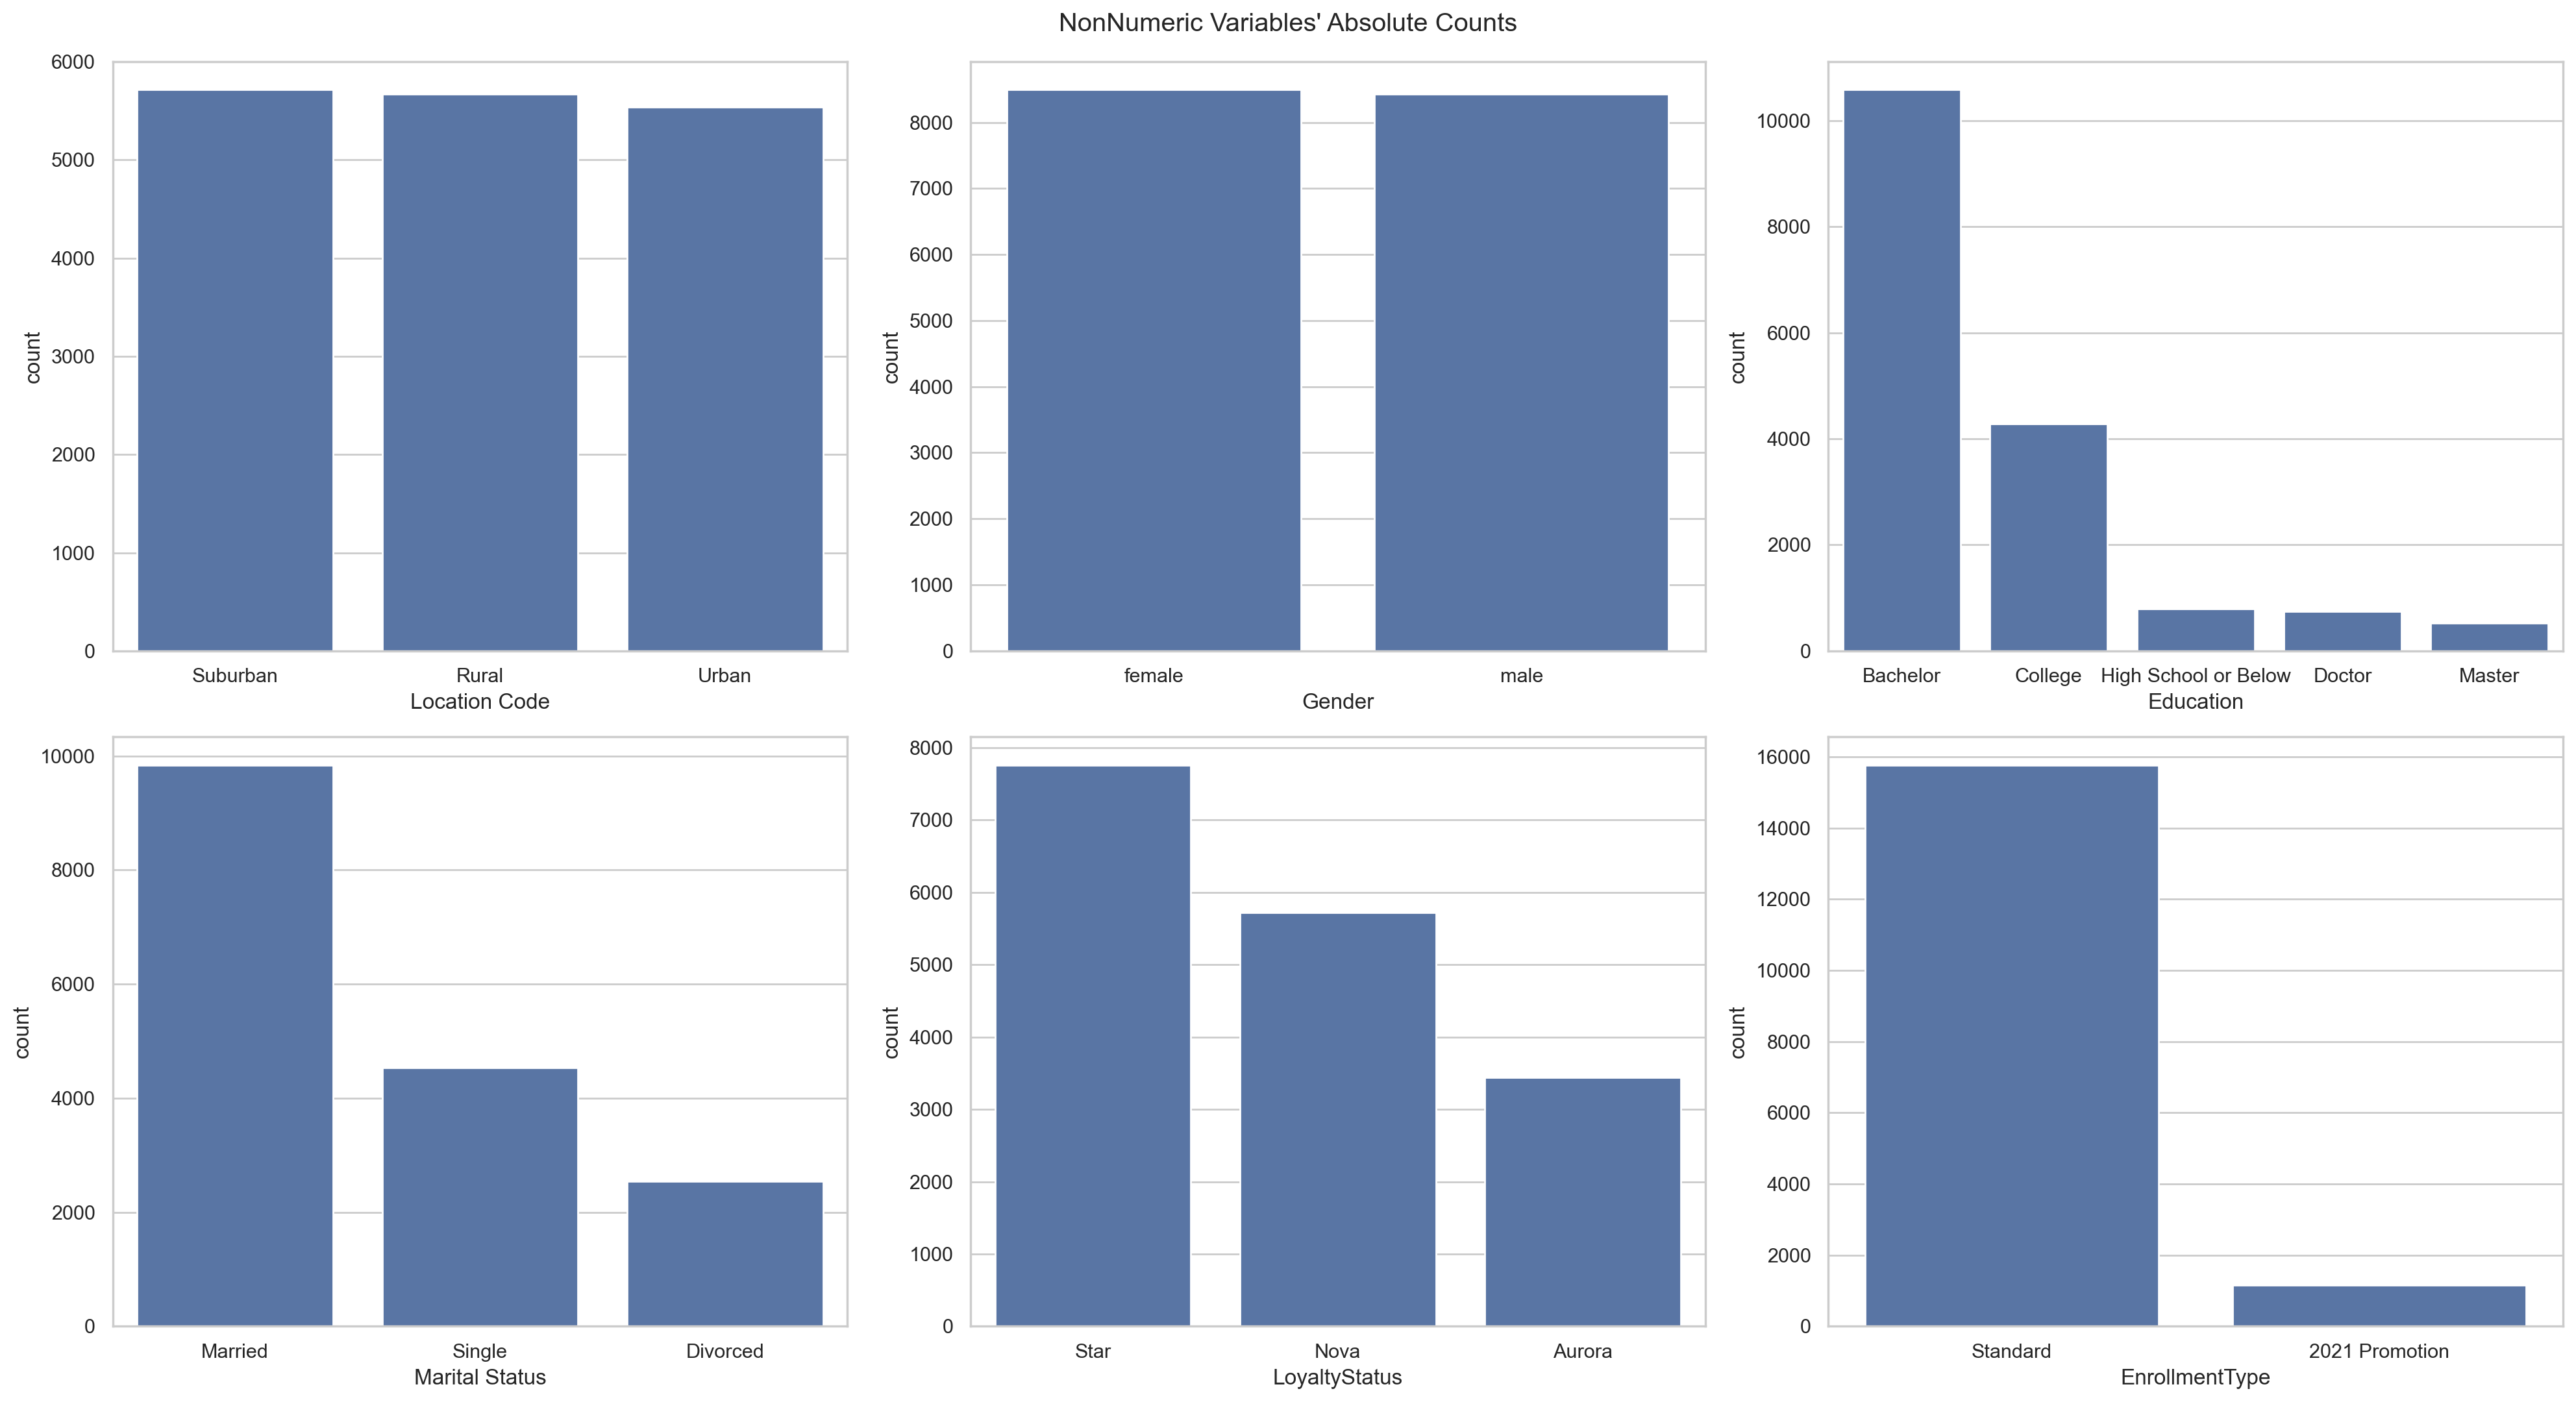

In [13]:
#Plot ALL Non Numeric Variables' Absolute Counts in one figure
non_metric_features = ['Location Code','Gender', 'Education', 'Marital Status','LoyaltyStatus','EnrollmentType']
sns.set() ## Reset to darkgrid

# Setting seaborn style
sns.set_style("whitegrid")

# Setting seaborn context
sns.set_context("notebook")



## What do these do?
sp_rows = 2
sp_cols = ceil(len(non_metric_features) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(x=df_customer[feat],order=df_customer[feat].value_counts().index,ax=ax)
# Layout
# Add a centered title to the figure:
title = "NonNumeric Variables' Absolute Counts"

plt.suptitle(title)
"""
if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the eda directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)
"""

plt.show()

## Bivariate Categorical Distribution

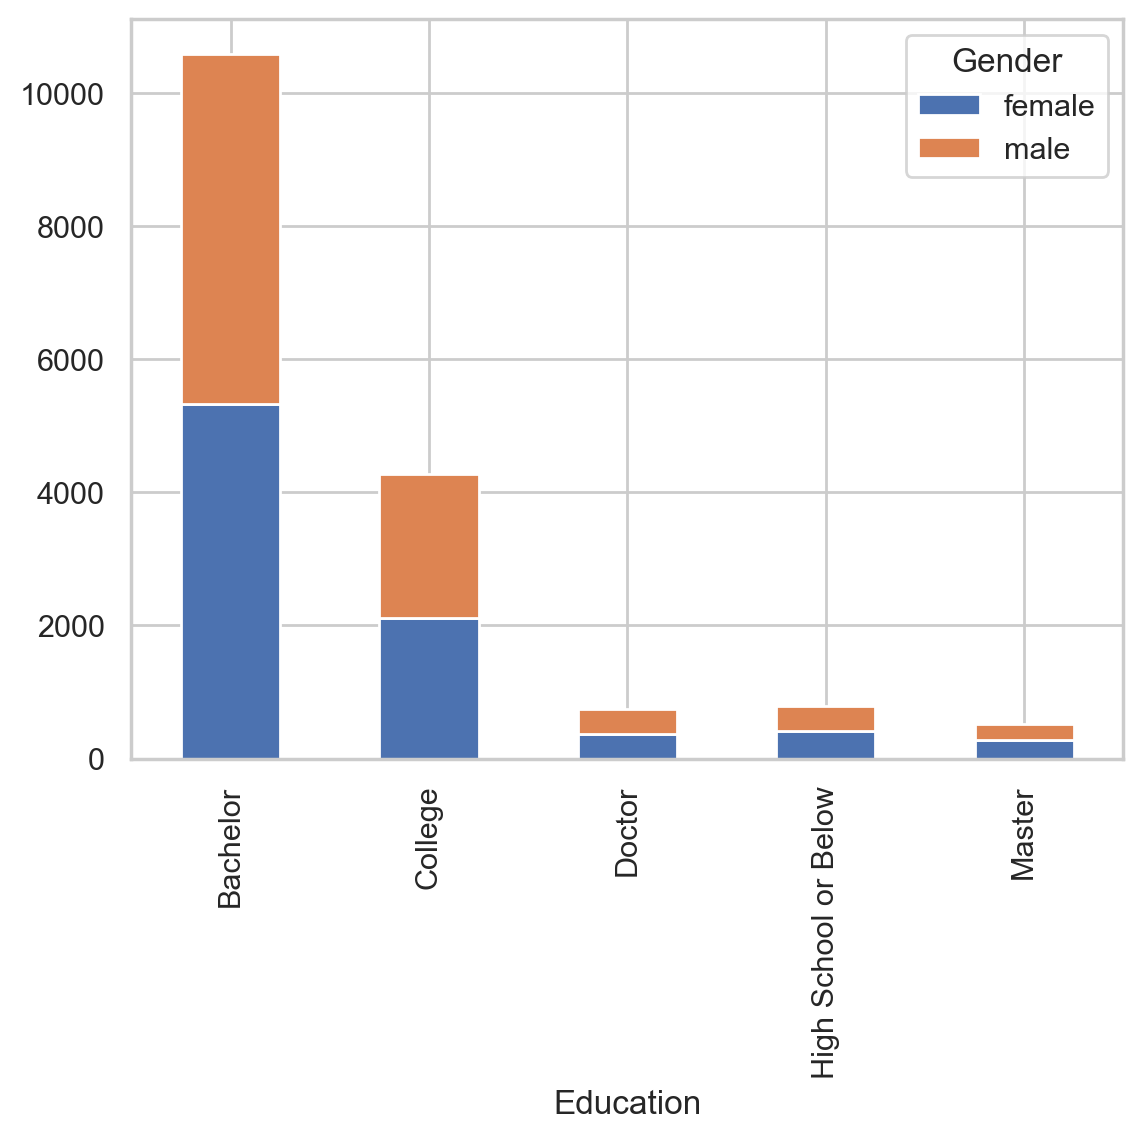

In [14]:
cat1 = 'Gender'
cat2 = 'Education'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)


plt.show()

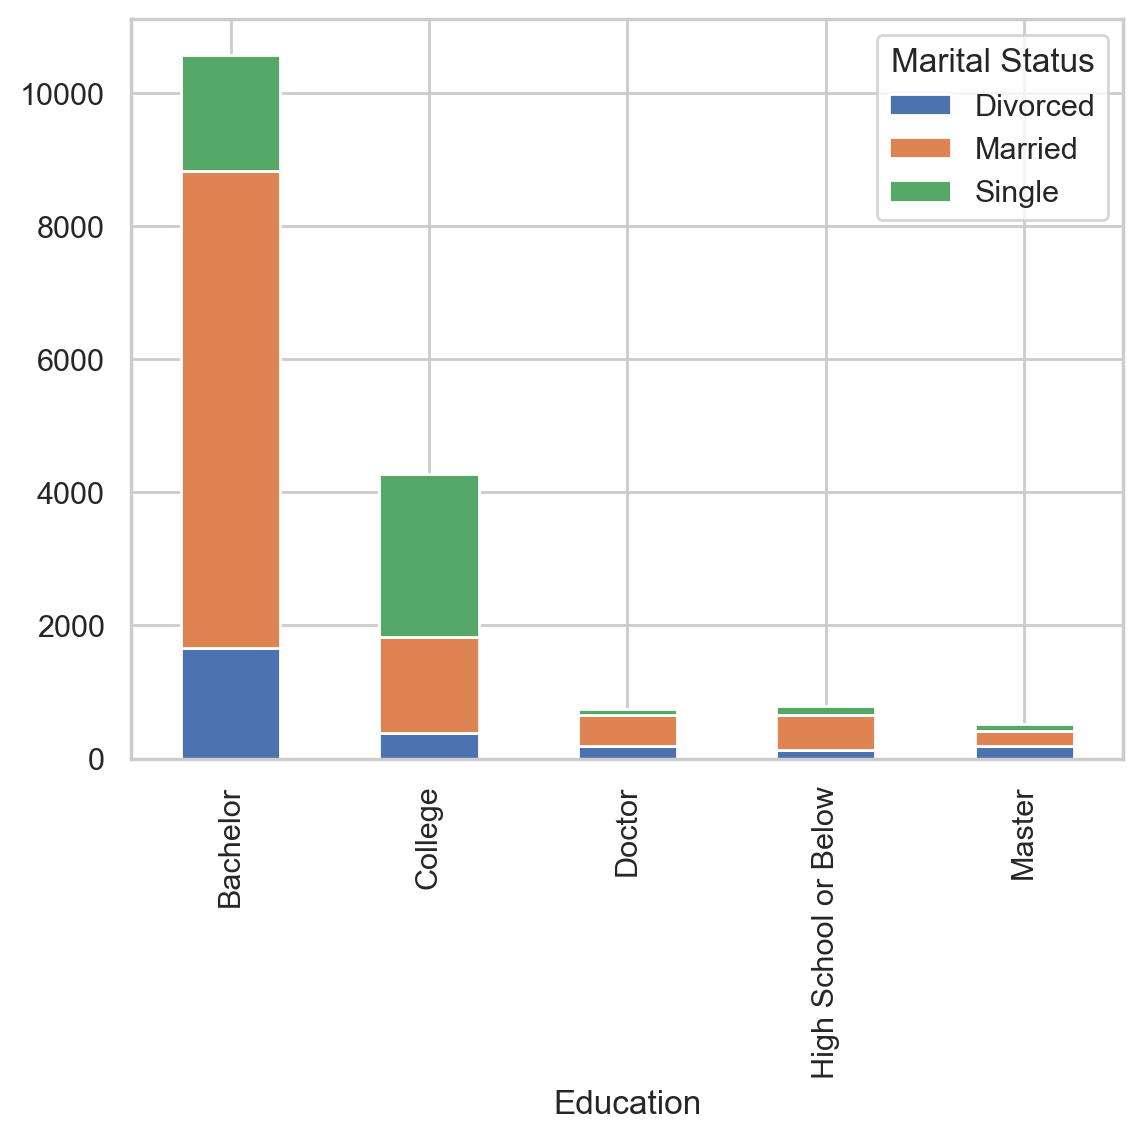

In [15]:
cat1 = 'Marital Status'
cat2 = 'Education'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)


plt.show()

<Axes: xlabel='Gender'>

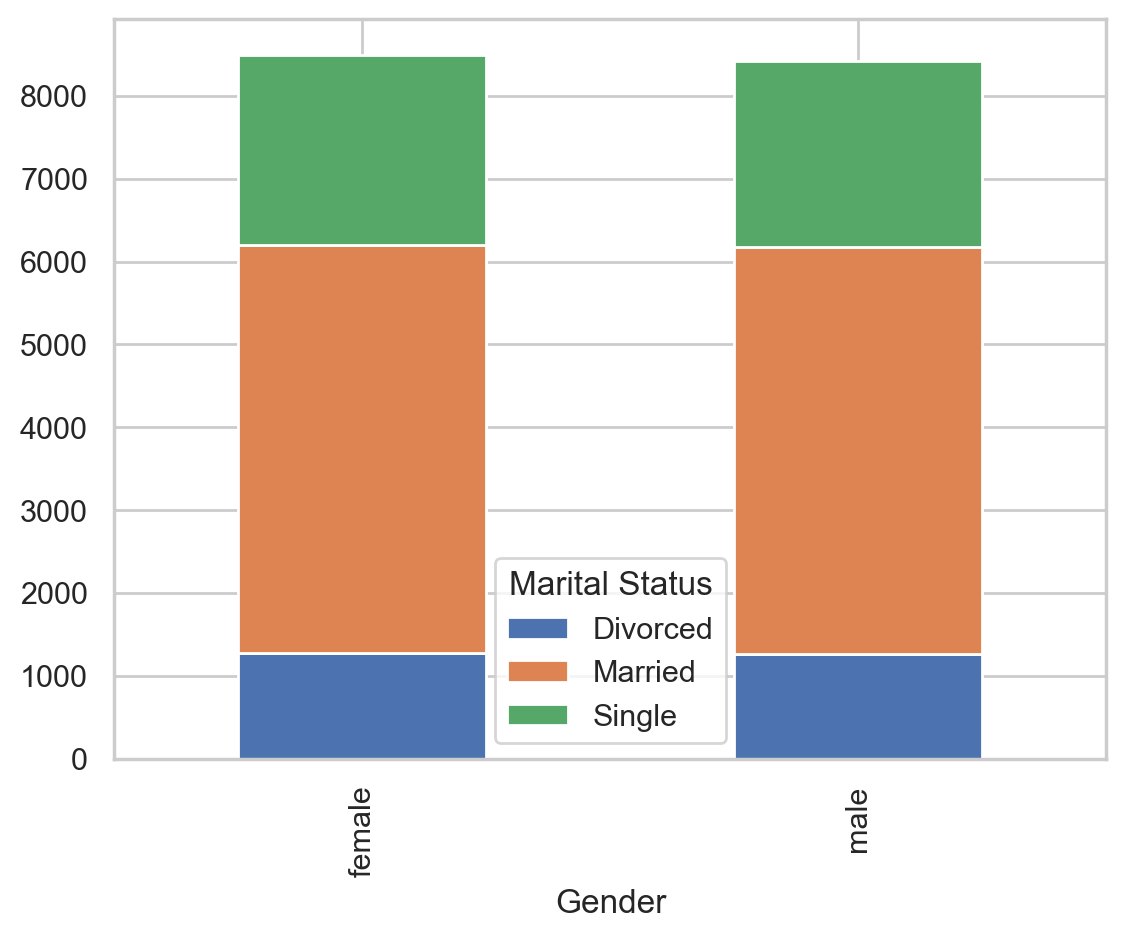

In [16]:
cat1 = 'Marital Status'
cat2 = 'Gender'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

<Axes: xlabel='Gender'>

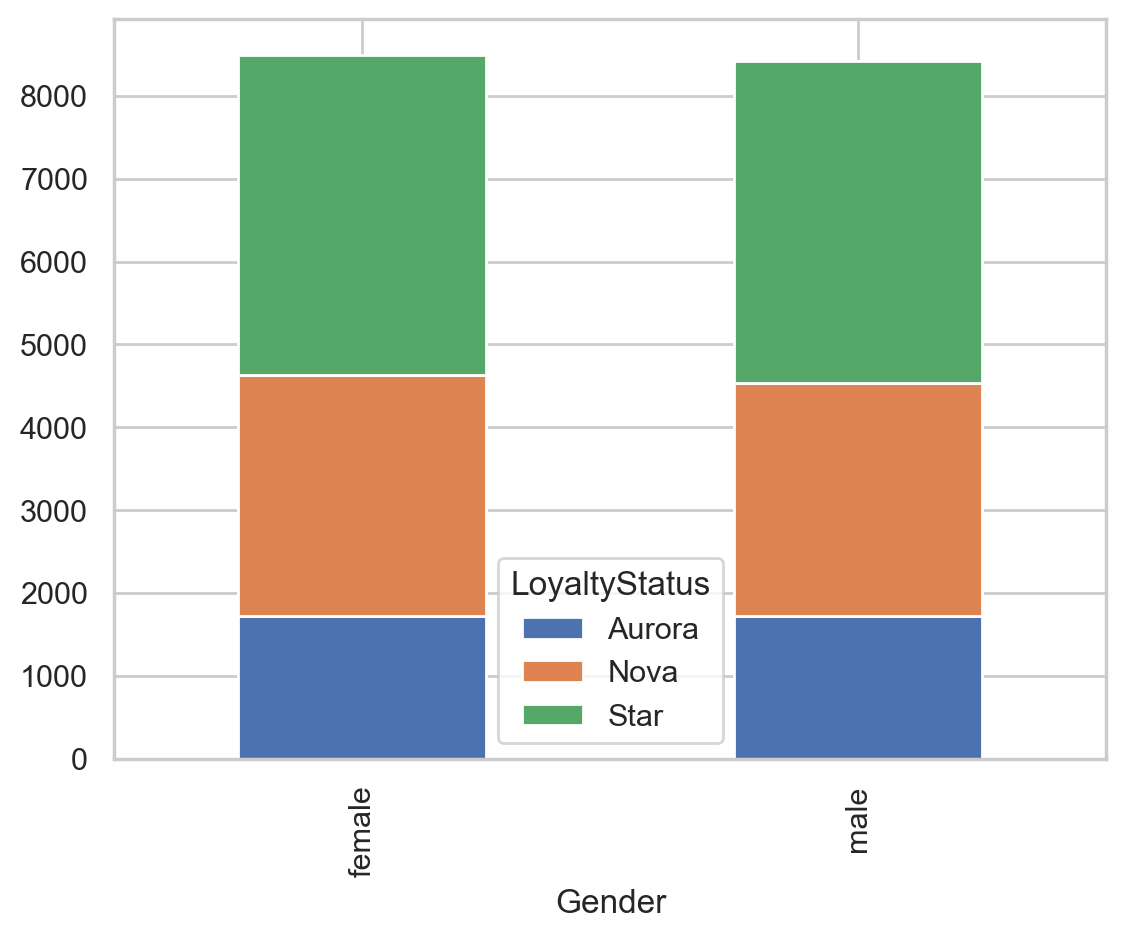

In [17]:
cat1 = 'LoyaltyStatus'
cat2 = 'Gender'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)


<Axes: xlabel='Education'>

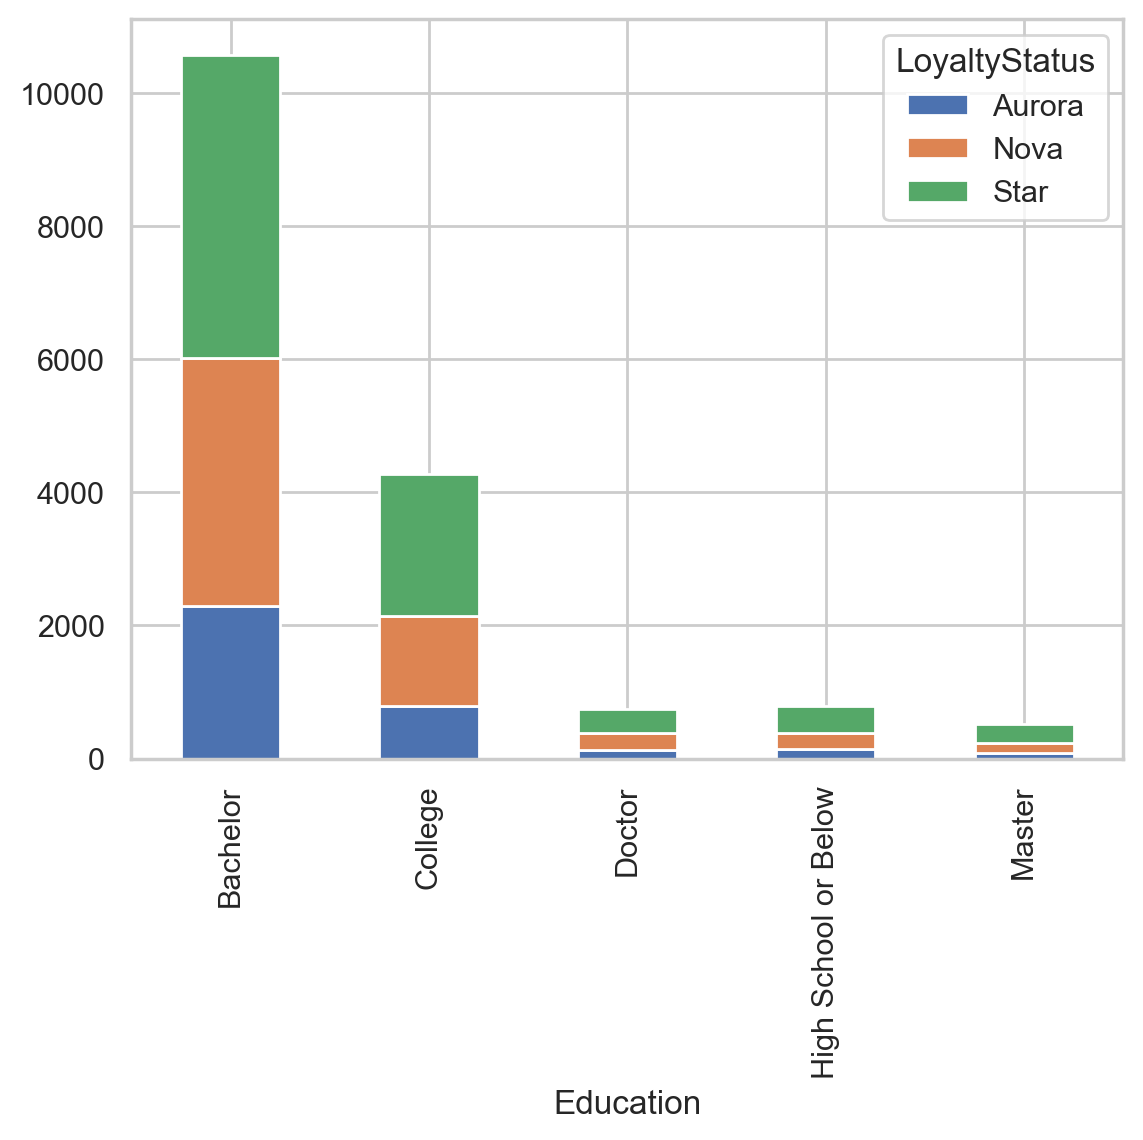

In [18]:
cat1 = 'LoyaltyStatus'
cat2 = 'Education'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

<Axes: xlabel='Marital Status'>

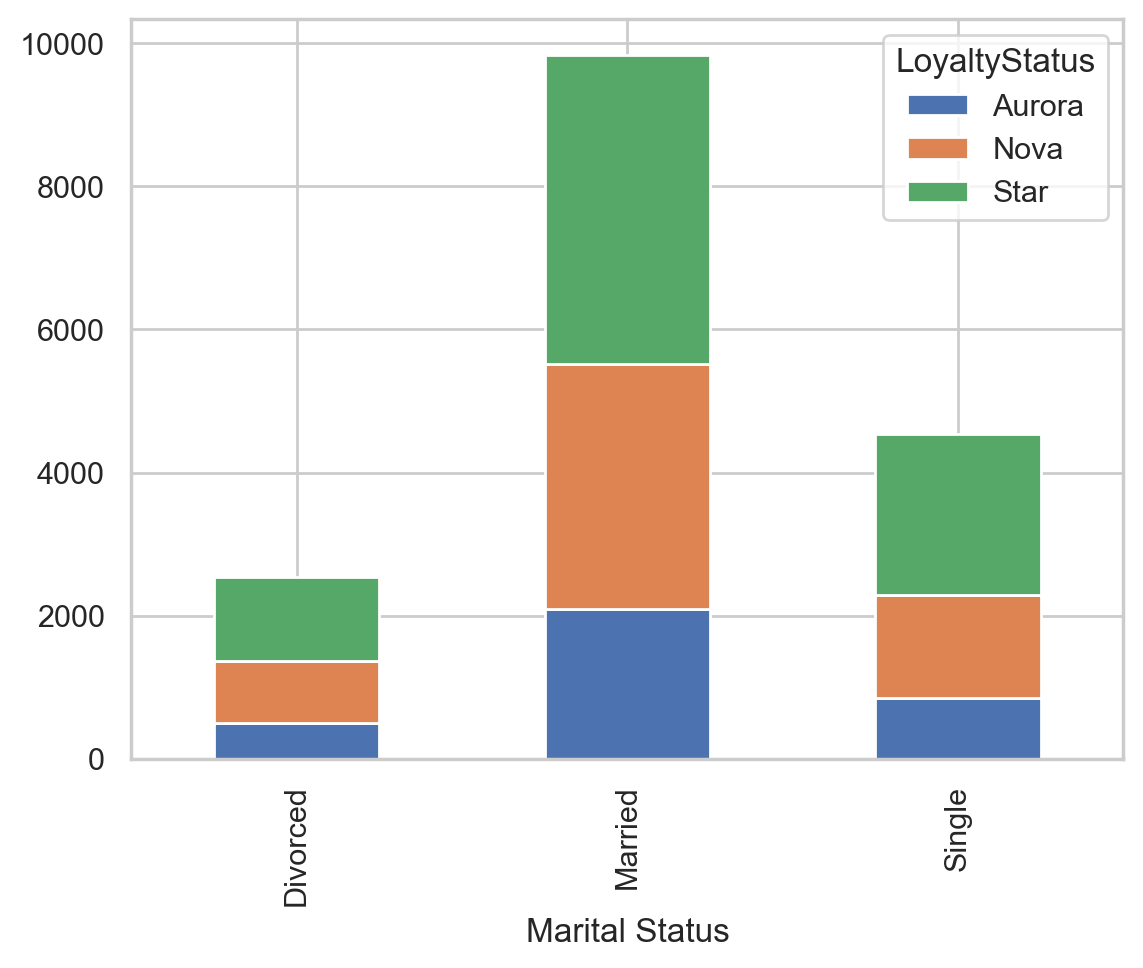

In [19]:
cat1 = 'LoyaltyStatus'
cat2 = 'Marital Status'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

<Axes: xlabel='Gender'>

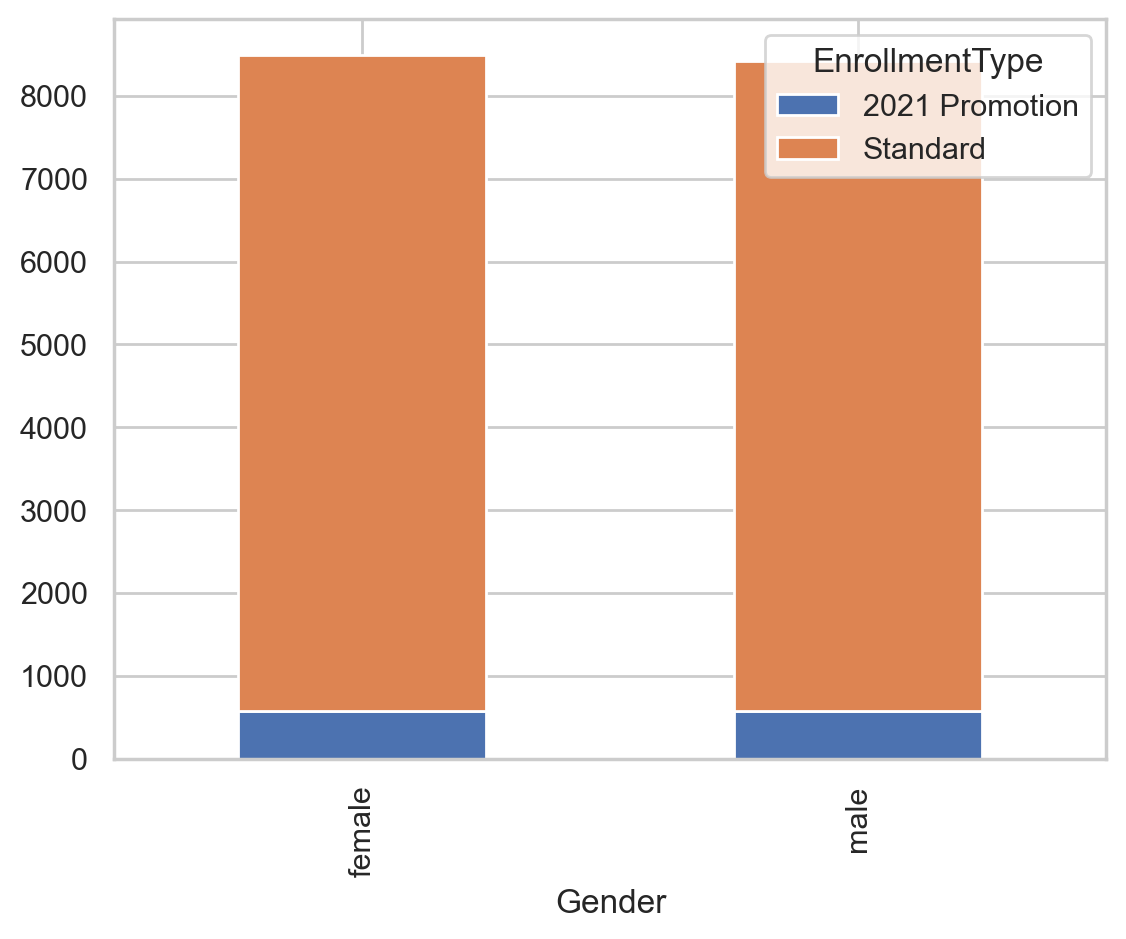

In [20]:
cat1 = 'EnrollmentType'
cat2 = 'Gender'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

<Axes: xlabel='Education'>

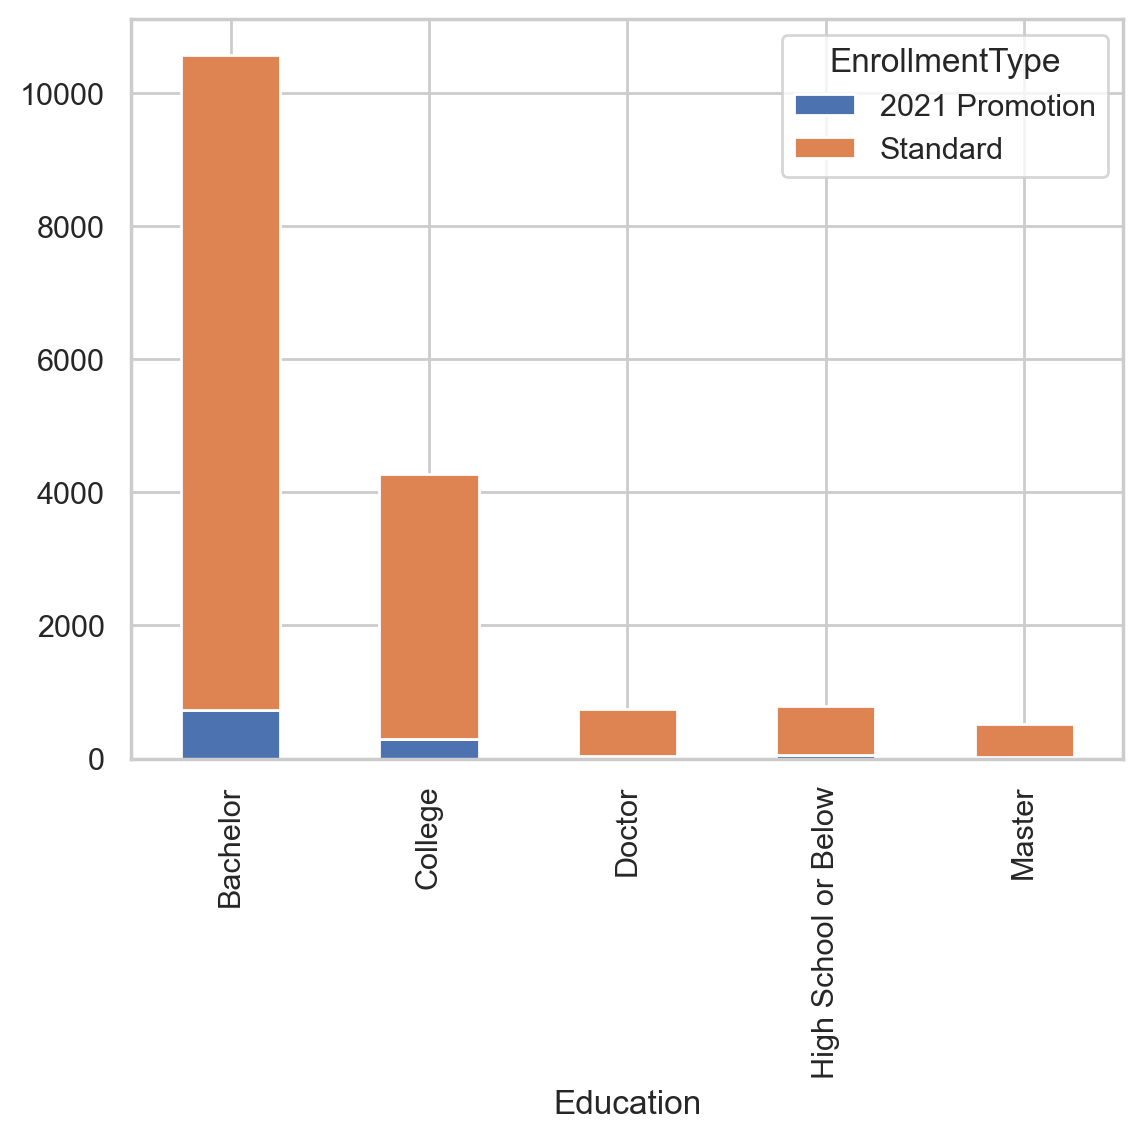

In [21]:
cat1 = 'EnrollmentType'
cat2 = 'Education'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

<Axes: xlabel='Marital Status'>

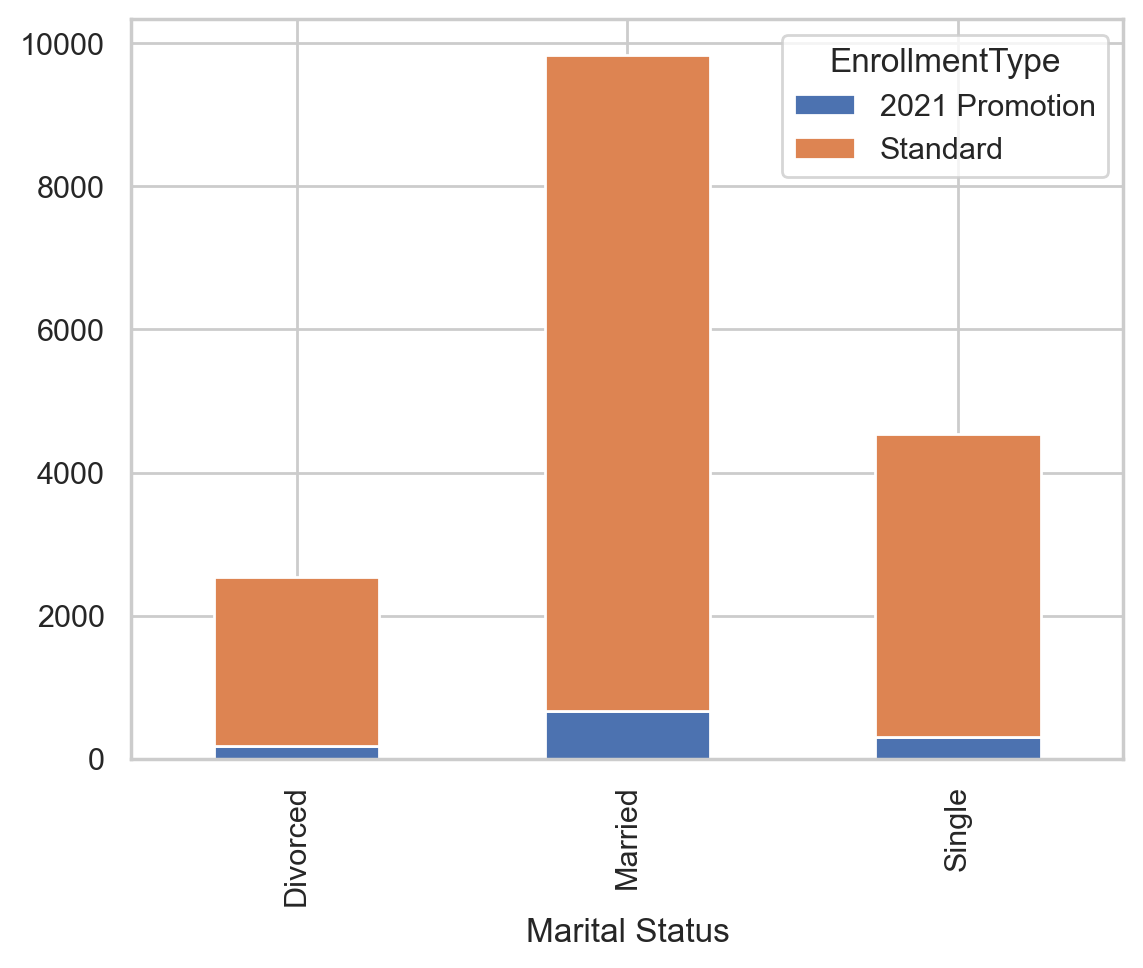

In [22]:
cat1 = 'EnrollmentType'
cat2 = 'Marital Status'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

<Axes: xlabel='LoyaltyStatus'>

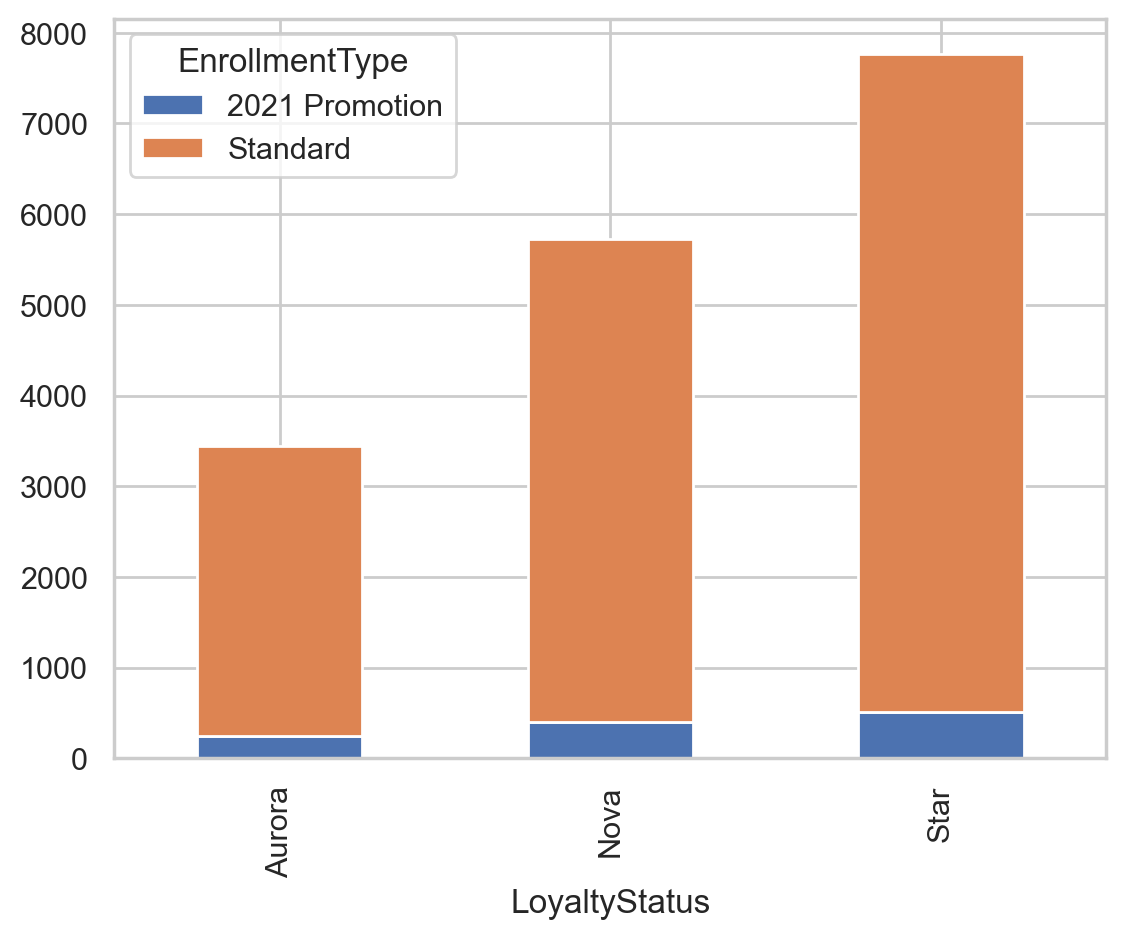

In [23]:
cat1 = 'EnrollmentType'
cat2 = 'LoyaltyStatus'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

<Axes: xlabel='Gender'>

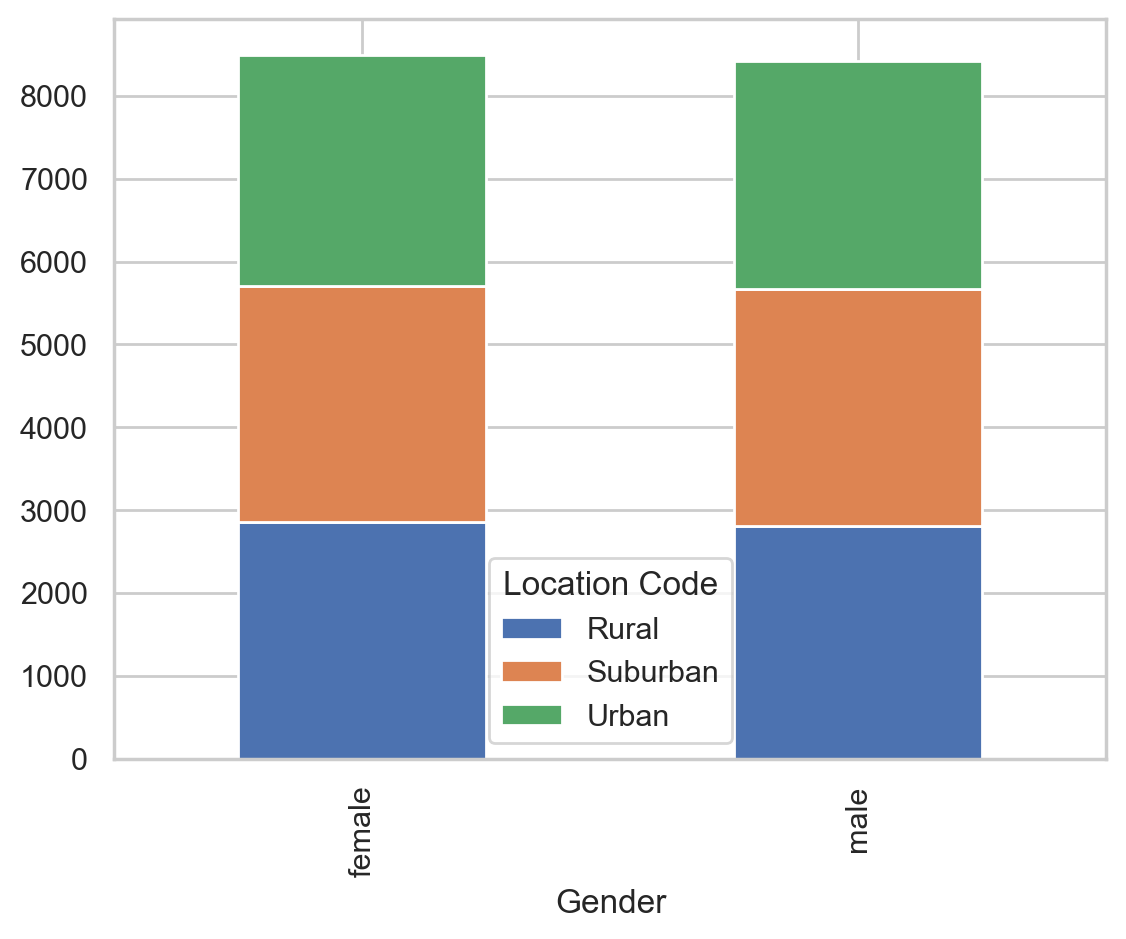

In [24]:
cat1 = 'Location Code'
cat2 = 'Gender'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

<Axes: xlabel='Education'>

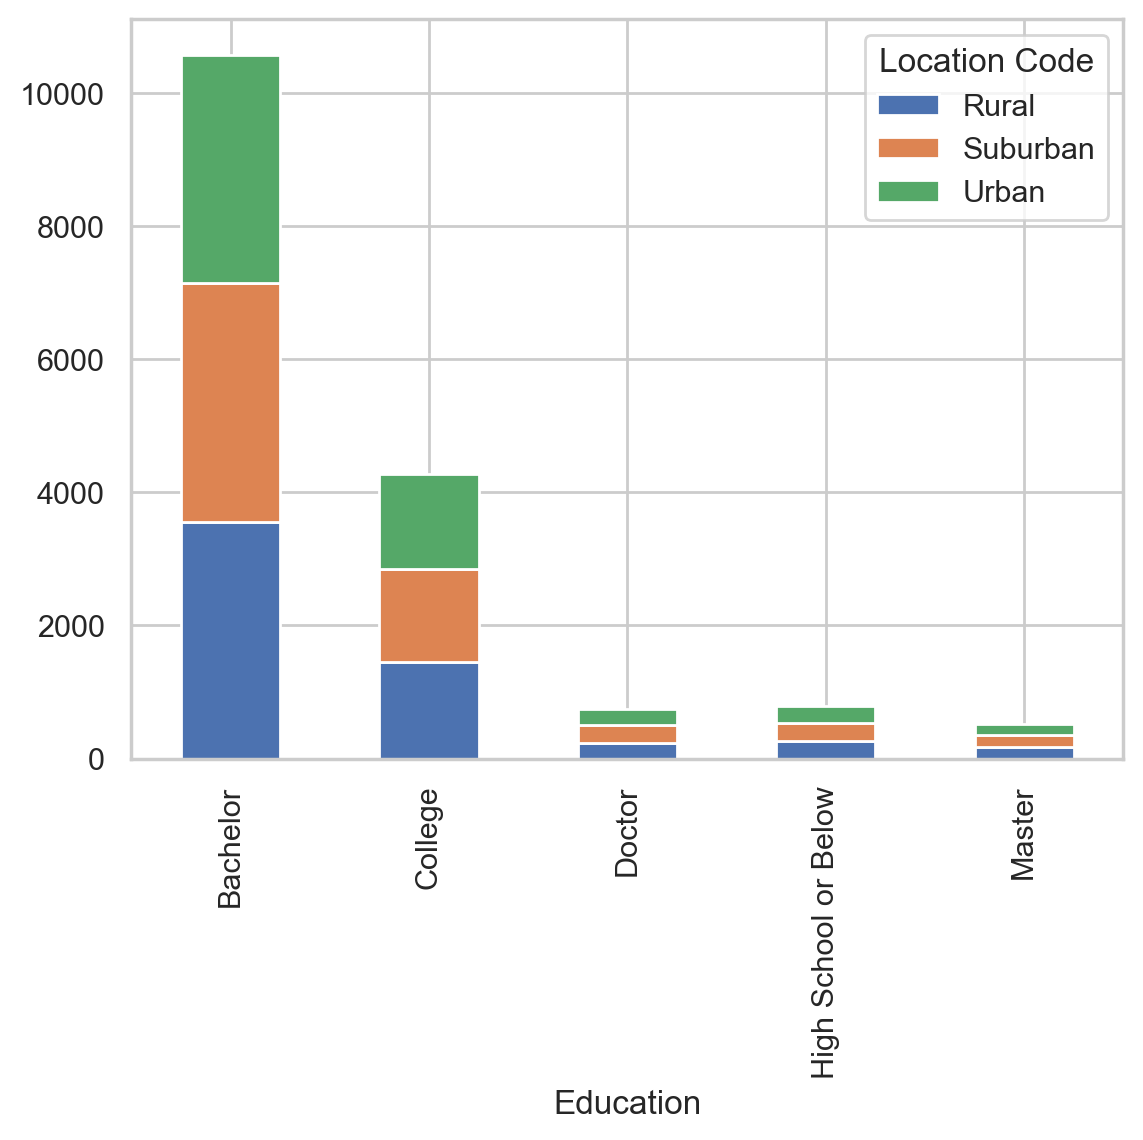

In [25]:
cat1 = 'Location Code'
cat2 = 'Education'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

<Axes: xlabel='Marital Status'>

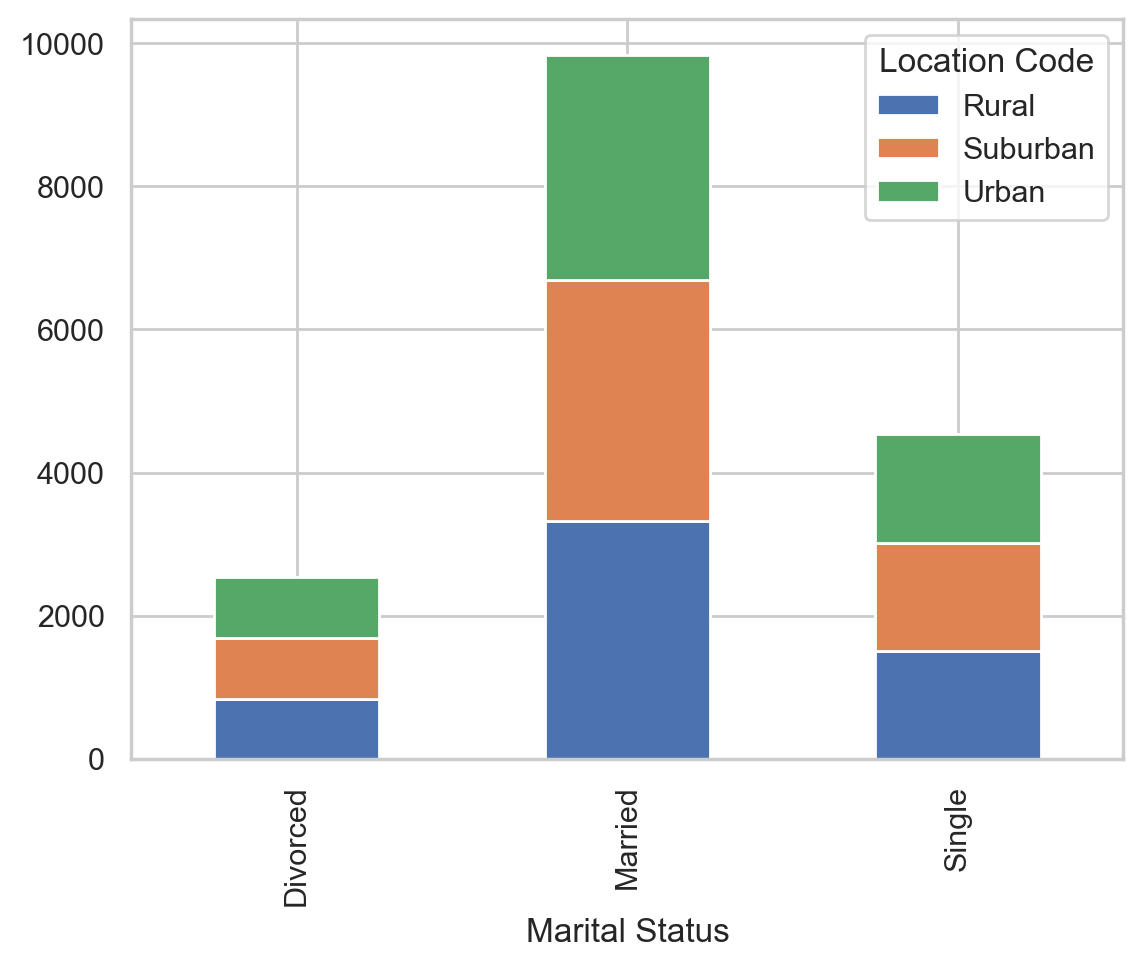

In [26]:
cat1 = 'Location Code'
cat2 = 'Marital Status'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

<Axes: xlabel='LoyaltyStatus'>

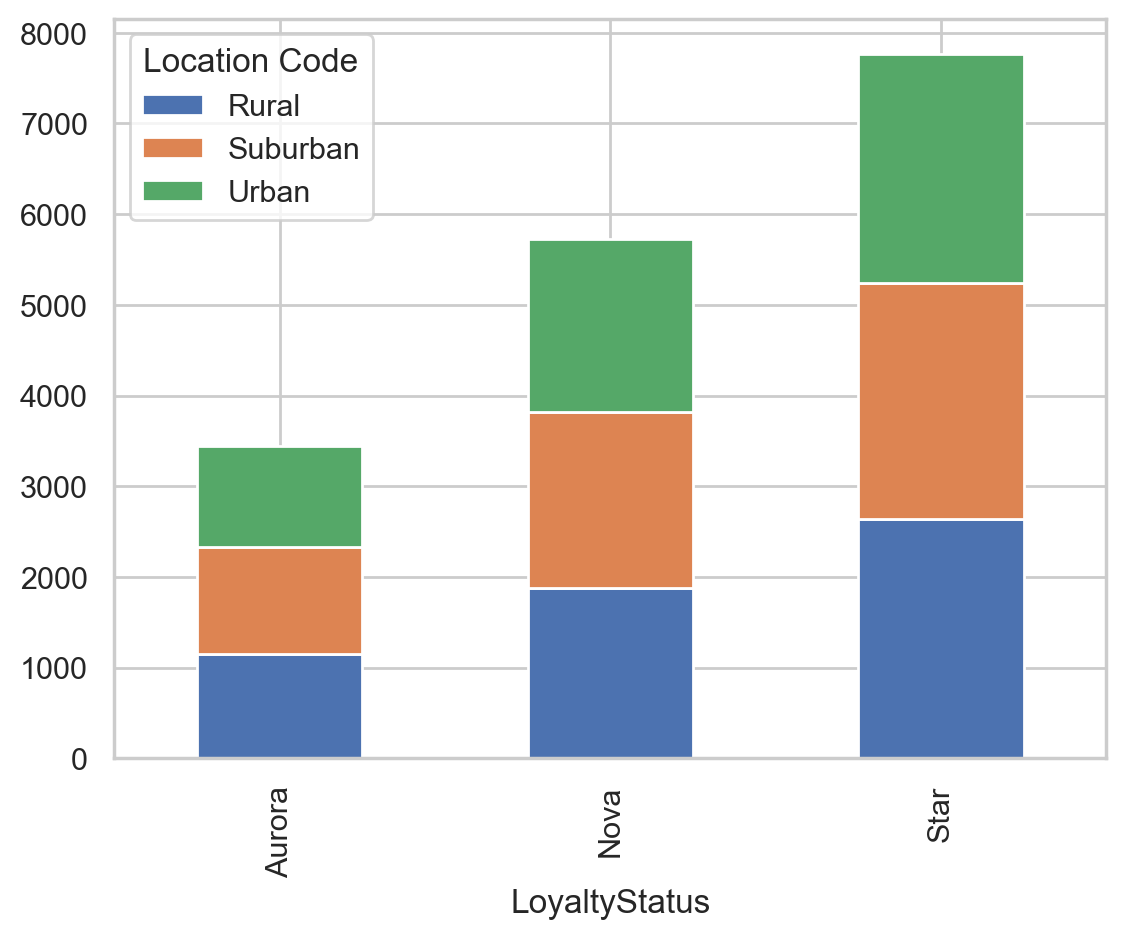

In [27]:
cat1 = 'Location Code'
cat2 = 'LoyaltyStatus'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

<Axes: xlabel='EnrollmentType'>

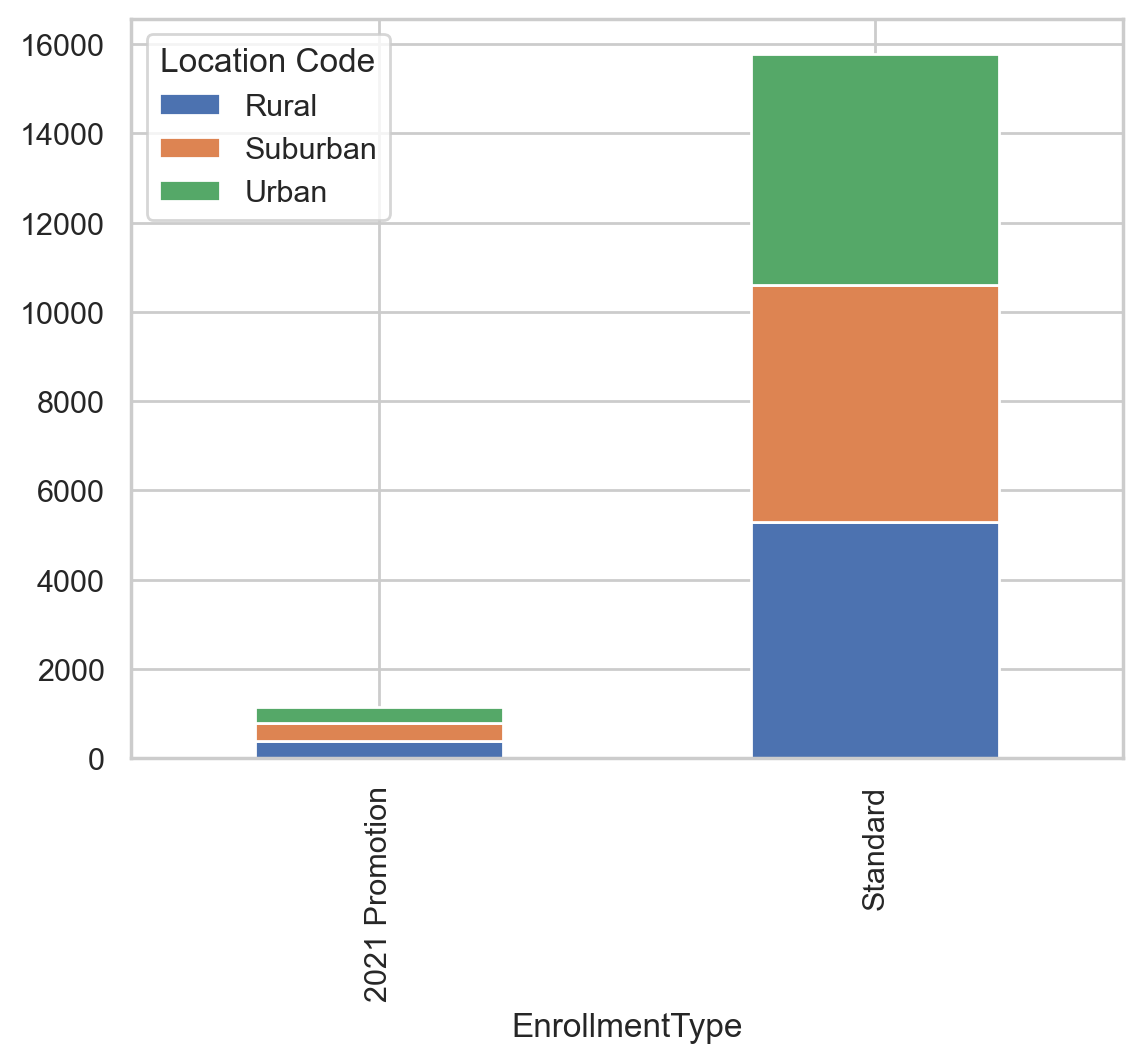

In [28]:
cat1 = 'Location Code'
cat2 = 'EnrollmentType'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

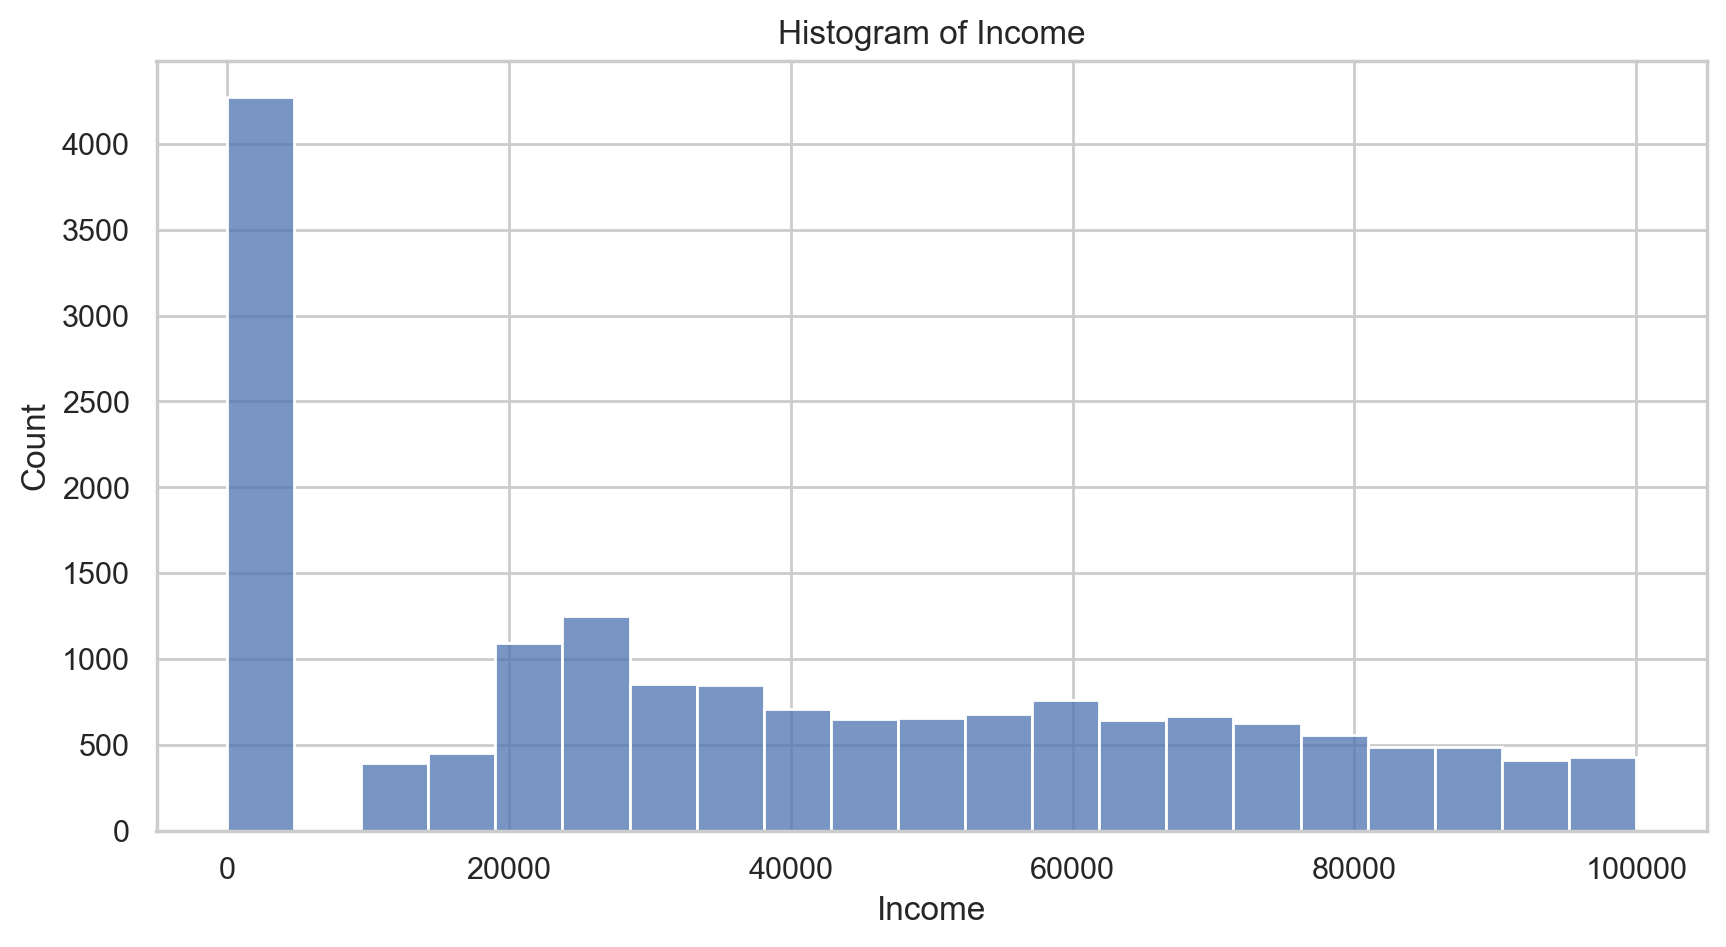

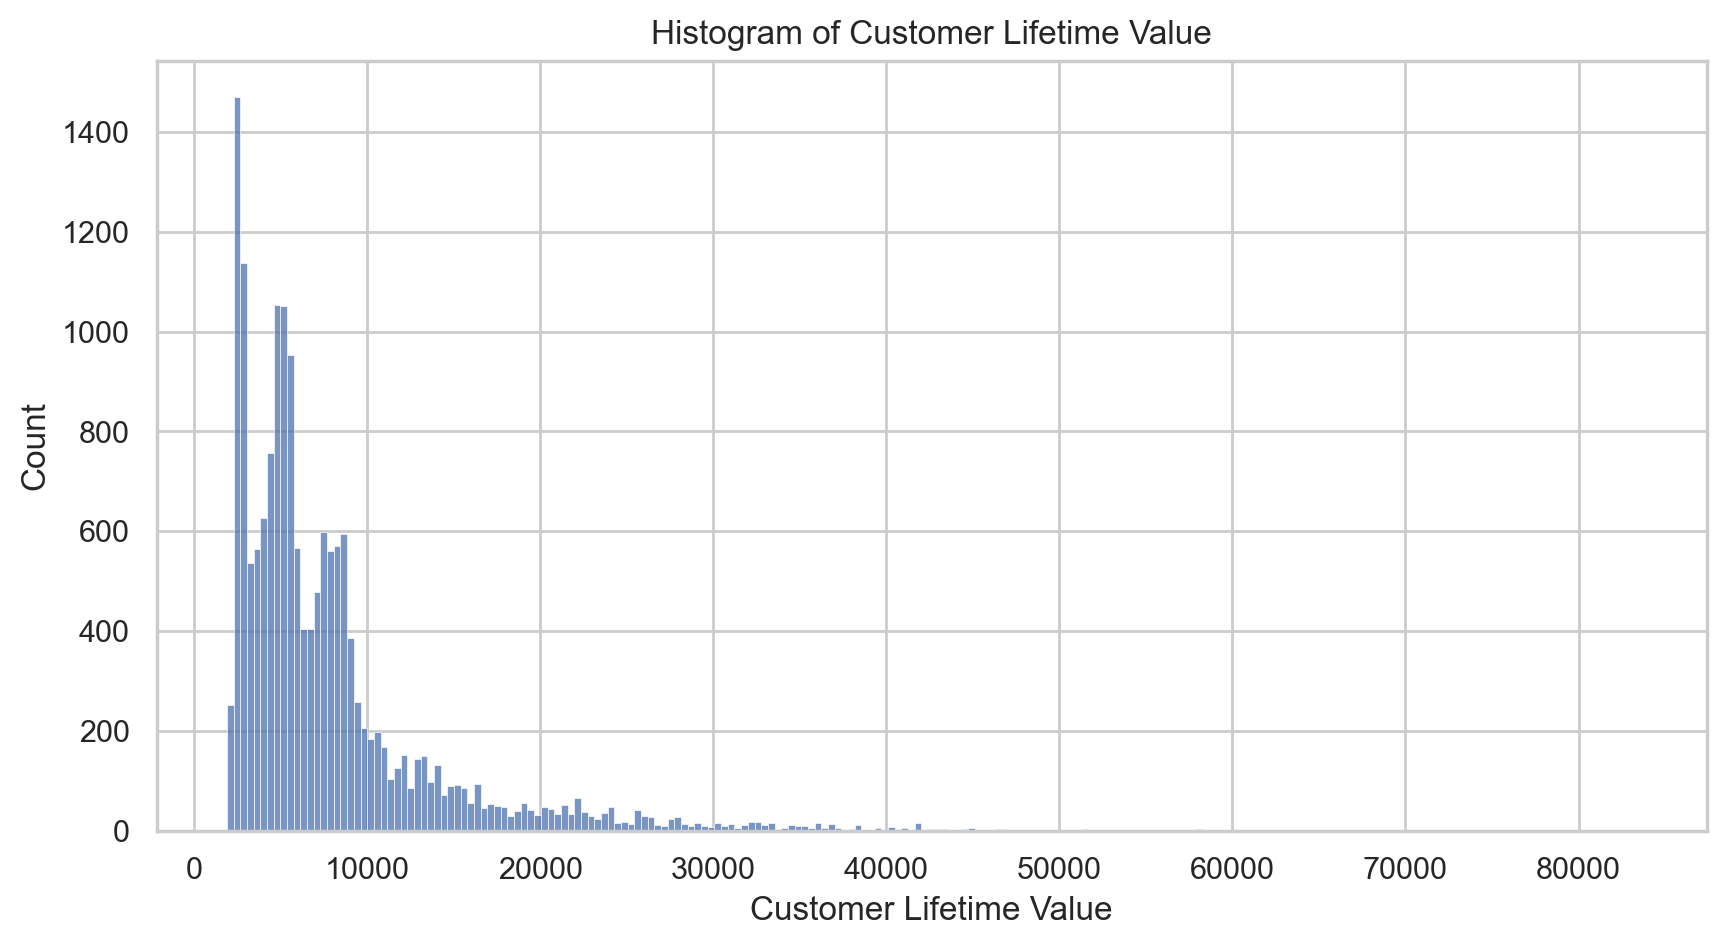

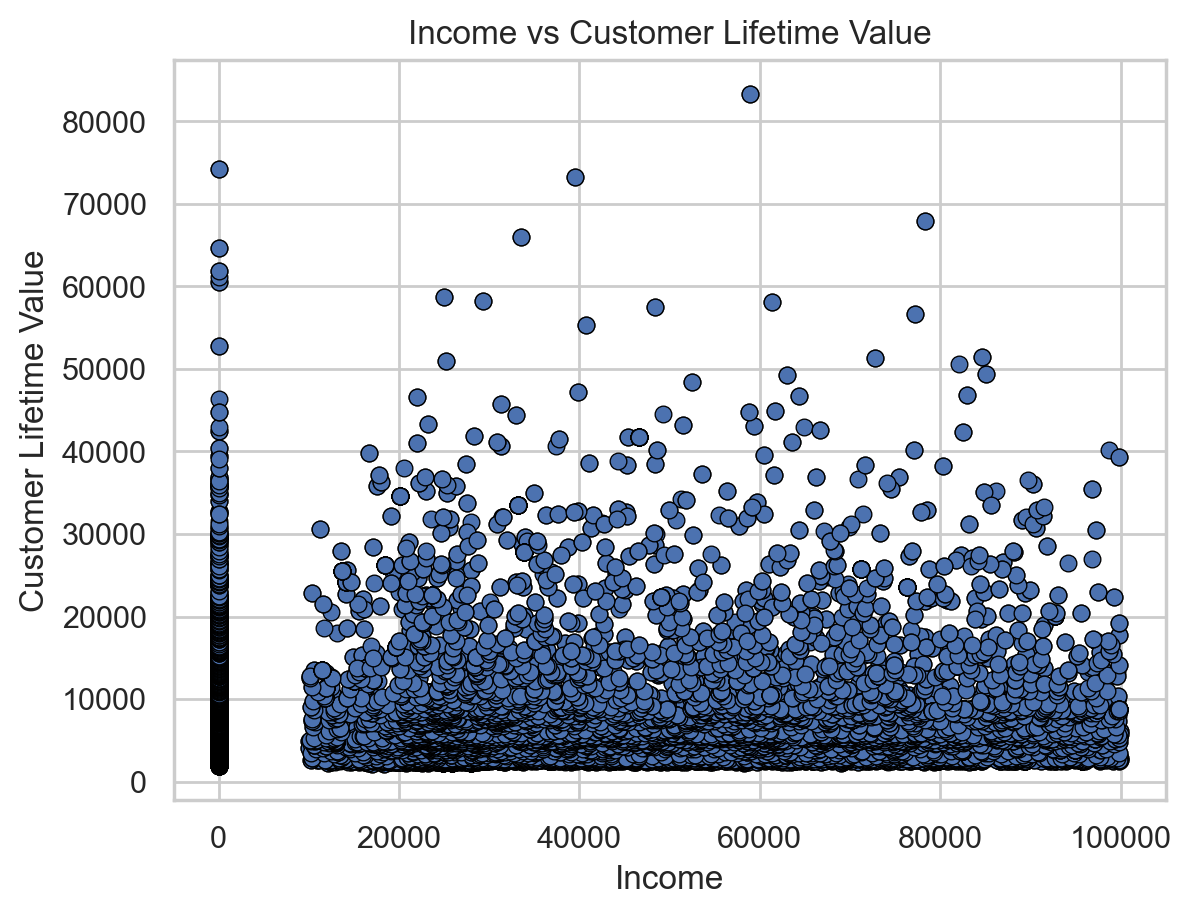

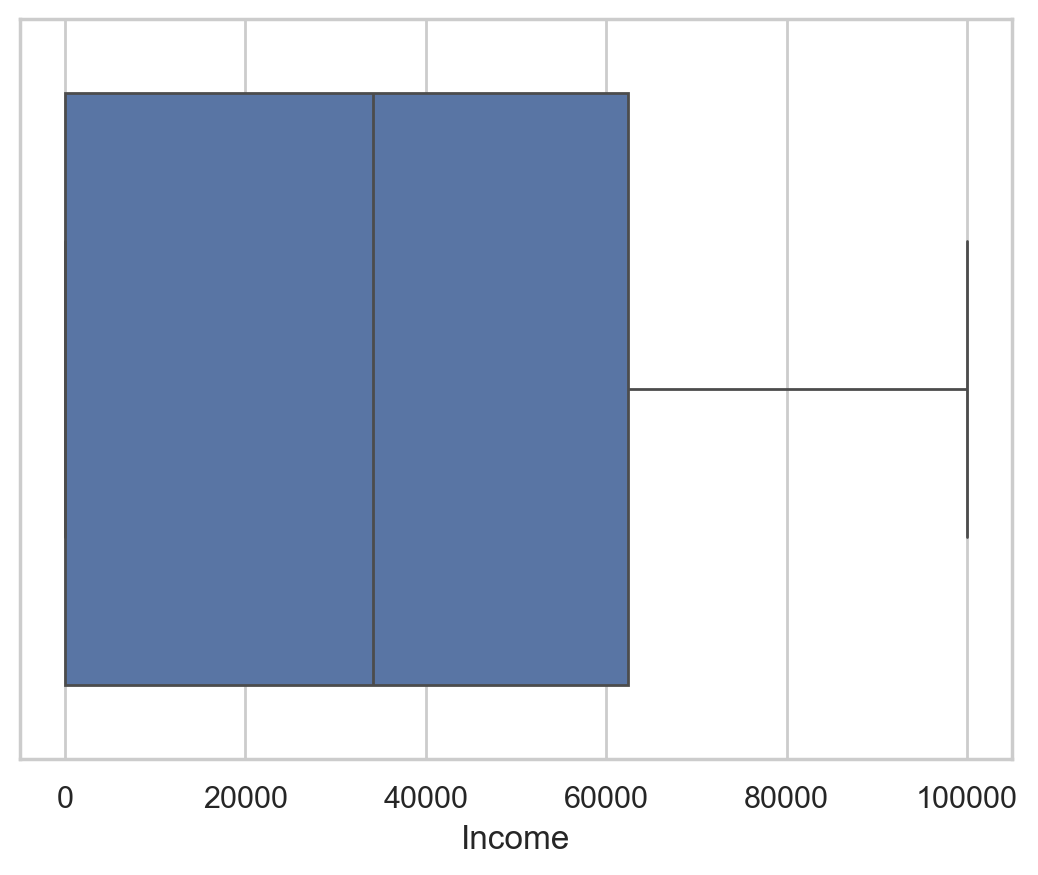

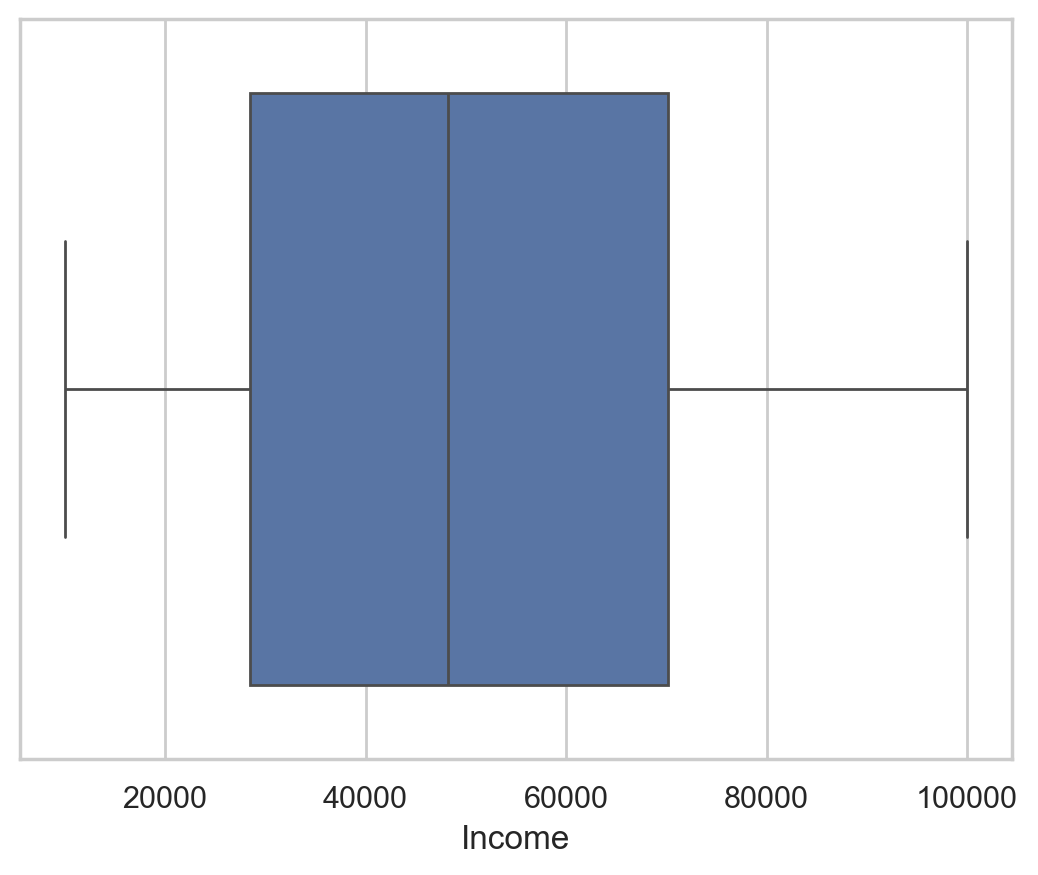

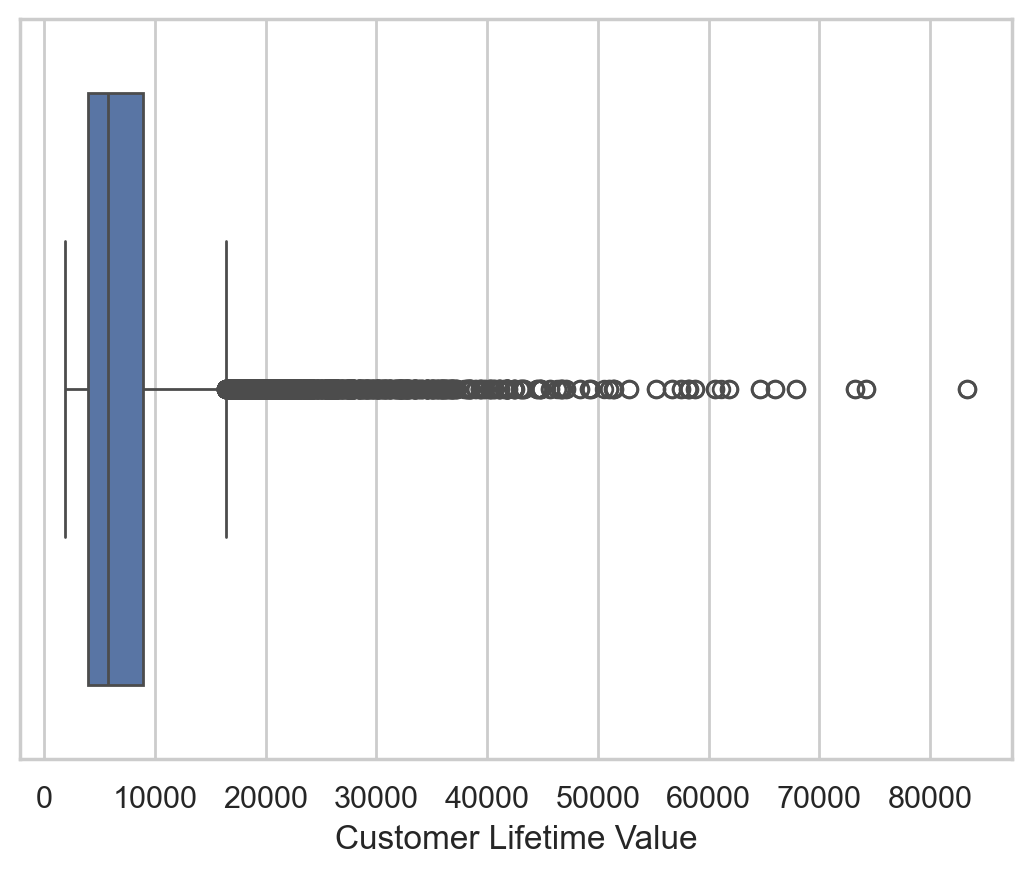

In [41]:
numeric_features = ['Income', 'Customer Lifetime Value']
for i in numeric_features:
    plt.figure(figsize=(10,5))
    sns.histplot(x=df_customer[i])
    plt.title(f'Histogram of {i}')
    plt.show()

sns.scatterplot(data=df_customer, x='Income', y='Customer Lifetime Value', edgecolor='black')
plt.title('Income vs Customer Lifetime Value')
plt.show()
sns.boxplot(x = df_customer['Income'])
plt.show()
sns.boxplot(x = df_customer[df_customer['Income']> 0]['Income'])
plt.show()
sns.boxplot(x = df_customer['Customer Lifetime Value'])
plt.show()

In [42]:
df_customer[(df_customer['Income'] == 0) & (df_customer['Education'] == "College")]

Unnamed: 0  Loyalty# First Name Last Name     Customer Name Country  \
1               1    549612      Dayle     Menez       Dayle Menez  Canada   
2               2    429460     Necole    Hannon     Necole Hannon  Canada   
3               3    608370      Queen     Hagee       Queen Hagee  Canada   
6               6    927943        Hue   Sellner       Hue Sellner  Canada   
13             13    988178      Andre   Cotugno     Andre Cotugno  Canada   
...           ...       ...        ...       ...               ...     ...   
16885       16885    632951    Devorah    Litzau    Devorah Litzau  Canada   
16891       16891    546773     Danyel   Arquitt    Danyel Arquitt  Canada   
16895       16895    900501  Genevieve    Sayyed  Genevieve Sayyed  Canada   
16896       16896    823768      Mandy  Sammarco    Mandy Sammarco  Canada   
16898       16898    776187     Janina      Lumb       Janina Lumb  Canada   

      Province or State       City   Latitude   Longitude  ... Location Code  \
1               Alberta   Edmonton  53.544388 -113.490930  ...         Rural   
2      British Columbia  Vancouver  49.282730 -123.120740  ...         Urban   
3               Ontario    Toronto  43.653225  -79.383186  ...      Suburban   
6               Ontario    Toronto  43.653225  -79.383186  ...         Urban   
13               Quebec   Montreal  45.501690  -73.567253  ...         Rural   
...                 ...        ...        ...         ...  ...           ...   
16885           Alberta   Edmonton  53.544388 -113.490930  ...         Rural   
16891  British Columbia  Vancouver  49.282730 -123.120740  ...      Suburban   
16895           Ontario    Sudbury  46.522099  -80.953033  ...         Rural   
16896  British Columbia  Vancouver  49.282730 -123.120740  ...         Rural   
16898  British Columbia  Vancouver  49.282730 -123.120740  ...         Urban   

      Income Marital Status LoyaltyStatus  EnrollmentDateOpening  \
1        0.0       Divorced          Star             2019-03-09   
2        0.0         Single          Star             2017-07-14   
3        0.0         Single          Star             2016-02-17   
6        0.0         Single          Star             2017-06-09   
13       0.0         Single          Star             2016-10-13   
...      ...            ...           ...                    ...   
16885    0.0        Married          Star             2021-07-10   
16891    0.0        Married          Star             2018-09-06   
16895    0.0         Single          Star             2015-09-17   
16896    0.0        Married          Star             2015-12-22   
16898    0.0         Single          Star             2017-03-24   

      CancellationDate Customer Lifetime Value EnrollmentType Income_Class  \
1                  NaT                 3839.61       Standard  Zero Income   
2           2021-01-08                 3839.75       Standard  Zero Income   
3                  NaT                 3839.75       Standard  Zero Income   
6                  NaT                 3857.95       Standard  Zero Income   
13                 NaT                 3871.07       Standard  Zero Income   
...                ...                     ...            ...          ...   
16885              NaT                44771.30       Standard  Zero Income   
16891              NaT                52811.49       Standard  Zero Income   
16895              NaT                61134.68       Standard  Zero Income   
16896              NaT                61850.19       Standard  Zero Income   
16898              NaT                74228.52       Standard  Zero Income   

       CustomerTenure  
1           1027 days  
2           1274 days  
3           2143 days  
6           1665 days  
13          1904 days  
...               ...  
16885        173 days  
16891       1211 days  
16895       2296 days  
16896       2200 days  
16898       1742 days  

[4273 rows x 23 columns]

In [43]:
import pandas as pd

# Create a new categorical flag
df_customer['Income_Class'] = df_customer['Income'].apply(
    lambda x: 'Zero Income' if x == 0 else 'Non-Zero Income'
)

# Quick check
df_customer['Income_Class'].value_counts()


Income_Class
Non-Zero Income    12648
Zero Income         4273
Name: count, dtype: int64

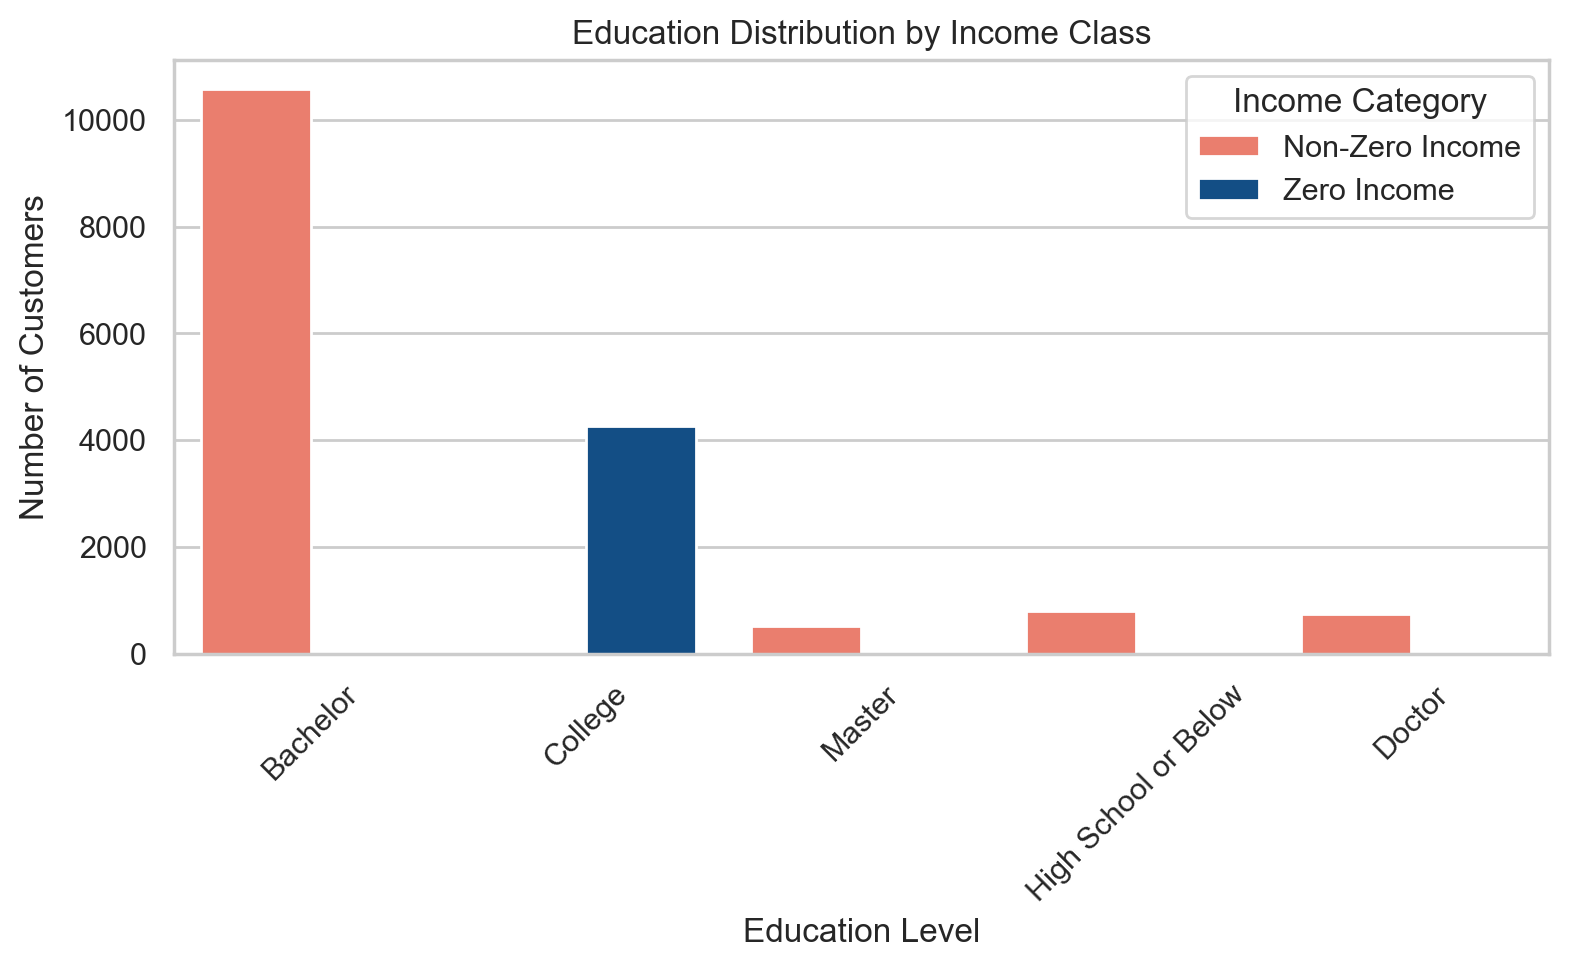

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(
    data=df_customer,
    x='Education',
    hue='Income_Class',
    palette=['#FF6F59', '#004E98']  # contrasting palette
)
plt.title('Education Distribution by Income Class')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.legend(title='Income Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
df_customer["Province or State"].nunique()

11

## Type conversion

In [65]:
df_customer["EnrollmentDateOpening"] = pd.to_datetime(df_customer["EnrollmentDateOpening"])
df_customer["CancellationDate"] = pd.to_datetime(df_customer["CancellationDate"], errors='coerce')

## NaN's

In [62]:
df_customer.isna().sum()

Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14613
Customer Lifetime Value       20
EnrollmentType                 0
Income_Class                   0
CustomerTenure                 0
dtype: int64

In [61]:
df_customer[df_customer['Customer Lifetime Value'].isna()]

Unnamed: 0  Loyalty# First Name Last Name    Customer Name Country  \
16901           0    999987      Layla    Murphy     Layla Murphy  Canada   
16902           1    999988       Jana    Parker      Jana Parker  Canada   
16903           2    999989      Ethan    Parker     Ethan Parker  Canada   
16904           3    999990       Ryan  Anderson    Ryan Anderson  Canada   
16905           4    999991     Olivia      Cote      Olivia Cote  Canada   
16906           5    999992       Ella       Roy         Ella Roy  Canada   
16907           6    999993     Elijah      Cook      Elijah Cook  Canada   
16908           7    999994      Ethan      Chan       Ethan Chan  Canada   
16909           8    999995       Liam      Wong        Liam Wong  Canada   
16910           9    999996   Isabella      Ross    Isabella Ross  Canada   
16911          10    999997      Grace    Miller     Grace Miller  Canada   
16912          11    999998       Noah  Thompson    Noah Thompson  Canada   
16913          12    999999       Noah    Walker      Noah Walker  Canada   
16914          13    100017      Grace    Fortin     Grace Fortin  Canada   
16915          14    100011     Amelia      Ross      Amelia Ross  Canada   
16916          15    100012      Ethan  Thompson   Ethan Thompson  Canada   
16917          16    100013      Layla     Young      Layla Young  Canada   
16918          17    100014     Amelia   Bennett   Amelia Bennett  Canada   
16919          18    100015   Benjamin    Wilson  Benjamin Wilson  Canada   
16920          19    100016       Emma    Martin      Emma Martin  Canada   

      Province or State          City   Latitude   Longitude  ...  \
16901     New Brunswick   Fredericton  46.029263  -66.565150  ...   
16902            Quebec      Montreal  45.573672  -73.523012  ...   
16903           Ontario       Trenton  44.075379  -77.550375  ...   
16904     New Brunswick       Moncton  46.106617  -64.714267  ...   
16905     New Brunswick   Fredericton  45.950000  -66.652437  ...   
16906           Ontario       Toronto  43.706878  -79.437412  ...   
16907  British Columbia  Dawson Creek  55.701475 -120.181716  ...   
16908           Ontario        Ottawa  45.365906  -75.723181  ...   
16909           Ontario        Ottawa  45.471557  -75.704868  ...   
16910           Ontario       Toronto  43.690489  -79.436758  ...   
16911     New Brunswick       Moncton  46.067243  -64.729480  ...   
16912            Quebec   Quebec City  46.749897  -71.238050  ...   
16913           Alberta      Edmonton  53.549353 -113.509109  ...   
16914  British Columbia  Dawson Creek  55.751178 -120.264920  ...   
16915           Ontario       Toronto  43.593187  -79.444335  ...   
16916            Quebec   Quebec City  46.759733  -71.141009  ...   
16917           Alberta      Edmonton  53.524829 -113.546357  ...   
16918     New Brunswick       Moncton  46.051866  -64.825428  ...   
16919            Quebec   Quebec City  46.862970  -71.133444  ...   
16920  British Columbia  Dawson Creek  55.720562 -120.160090  ...   

      Location Code Income Marital Status LoyaltyStatus  \
16901         Urban    NaN         Single          Star   
16902         Rural    NaN         Single          Star   
16903         Rural    NaN        Married          Star   
16904         Rural    NaN        Married          Star   
16905      Suburban    NaN        Married          Star   
16906      Suburban    NaN         Single          Star   
16907      Suburban    NaN        Married          Star   
16908         Rural    NaN        Married          Star   
16909      Suburban    NaN        Married          Star   
16910      Suburban    NaN         Single          Star   
16911         Urban    NaN        Married          Star   
16912         Urban    NaN         Single          Star   
16913         Rural    NaN         Single          Star   
16914         Urban    NaN        Married          Star   
16915      Suburban    NaN        Married          Sta

By analyzing the previous dataframe, we can conclude that the NaN values in Income occur in the same rows as the NaN values in Customer Lifetime Value. Since there are only 20 rows, we will drop them in a future analysis.

In the next delivery, we will handle the NaN values in CancellationDate as shown below, since we interpret NaN as indicating that the customer is still active. Next, we will create a histogram to compare customers who have already canceled the service with those who are still with us. 

In [ ]:
print(df_customer["EnrollmentDateOpening"].max())
print(df_customer["CancellationDate"].max())

2021-12-30 00:00:00
2021-12-30 00:00:00


In [70]:
"""df_customer['CustomerTenure'] = (df_customer['CancellationDate'].fillna(pd.to_datetime("2021-12-30 00:00:00") + pd.Timedelta(days=1)) - df_customer['EnrollmentDateOpening'])
df_customer"""

'df_customer[\'CustomerTenure\'] = (df_customer[\'CancellationDate\'].fillna(pd.to_datetime("2021-12-30 00:00:00") + pd.Timedelta(days=1)) - df_customer[\'EnrollmentDateOpening\'])\ndf_customer'

#fazer histograma com as customr tenure
# % de clientes ativos vs cancelados

## Futuras Alterações

In [54]:
df_customer["Loyalty#"].count()-df_customer["Loyalty#"].nunique()

np.int64(164)

Since df_customer["Loyalty#"].nunique() is smaller than df_customer["Loyalty#"].count() and df_customer["Customer Name"].nunique() is equal to df_customer[""Customer Name""].count(), we have different people with the same Loyalty#. Since the number of times that this happen (164) is insignificant compared to the number of lines (16921) in the next delivery we will drop them and later we can pass Loyalty# to index. When we do that we can drop the 3 columns that are related with the customer name. In the df_customer["Country"] we have always the result "Canada" so we can drop that too.

## Extra Points

In [56]:
import plotly.express as px

fig = px.scatter_geo(
    df_customer,
    lat='Latitude',
    lon='Longitude',
    color='Customer Lifetime Value',
    hover_name='City',
    hover_data=['Province or State', 'Income', 'LoyaltyStatus'],
    projection='natural earth',
    color_continuous_scale='viridis',
    title='Customer Distribution Across Canada',
    scope='north america'  # foca a vista na América do Norte
)

# Ajustar a vista para o Canadá (zoom e centragem)
fig.update_geos(
    center=dict(lat=56.1304, lon=-106.3468),  # coordenadas médias do Canadá
    lataxis_range=[40, 75],                   # latitude range (ajustável)
    lonaxis_range=[-140, -50],                # longitude range (ajustável)
    showcountries=True, countrycolor="LightGray",
    showland=True, landcolor="whitesmoke",
    lakecolor="LightBlue",
    showocean=True, oceancolor="aliceblue"
)

# Layout visual
fig.update_layout(
    title_font=dict(size=22, family='Arial', color='black'),
    geo_bgcolor='rgba(0,0,0,0)',
    height=700,
    width=1000,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()


In [57]:
import plotly.express as px

# Paleta azul-dourado premium (AIAI style)
aiai_palette = [(0, "#004E98"), (0.5, "#FFD23F"), (1, "#FF6F59")]

fig = px.scatter_geo(
    df_customer,
    lat='Latitude',
    lon='Longitude',
    color='Customer Lifetime Value',
    hover_name='City',
    hover_data={
        'Province or State': True,
        'Income': True,
        'LoyaltyStatus': True,
        'Latitude': False,
        'Longitude': False
    },
    projection='mercator',
    color_continuous_scale=aiai_palette,
    title='Customer Lifetime Value Distribution — Amazing International Airlines (Canada)',
    scope='north america',
    size='Income',               # pontos maiores = maior rendimento
    size_max=15,
    opacity=0.75
)

# Configuração do mapa — foco e estilo
fig.update_geos(
    center=dict(lat=56.1304, lon=-106.3468),
    lataxis_range=[42, 72],
    lonaxis_range=[-140, -50],
    showland=True, landcolor="white",
    showcountries=True, countrycolor="lightgrey",
    showocean=True, oceancolor="#e8f1f8",
    lakecolor="#cfe5fa",
    showlakes=True,
    fitbounds="locations"
)

# Legenda (colorbar)
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Customer Lifetime Value (CLV)",
        tickprefix="$",
        ticks="outside",
        tickfont=dict(size=12, color='black'),
        titlefont=dict(size=14, family='Arial', color='black'),
        len=0.6,
        yanchor="middle",
        y=0.5
    ),
    title_font=dict(size=22, family='Arial Black', color='#002B5B'),
    geo_bgcolor='rgba(0,0,0,0)',
    height=700,
    width=1000,
    margin=dict(l=0, r=0, t=70, b=0),
    paper_bgcolor='white'
)

fig.show()


ValueError: 
    Invalid element(s) received for the 'size' property of scattergeo.marker
        Invalid elements include: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above